<span style="color:orchid">
<font size="6">Kmeans Clustering</font>
</span> 


In [1]:
import pickle
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

<span style="color:orchid">
<font size="5">Kmeans Clustering with PCA</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [2]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *

In [3]:
dataset='591'
df=loaddata(
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [4]:

from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [5]:
from Kmeans_model import *
kmeans = Kmeans_Clustering(feature_vectors,y)

<span style="color:DodgerBlue">
<font size="4">Confusion Matrix</font>
</span> 

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


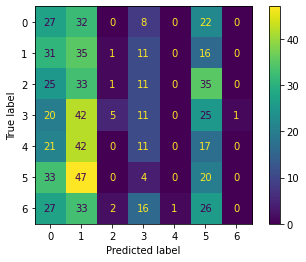

In [6]:
kmeans.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


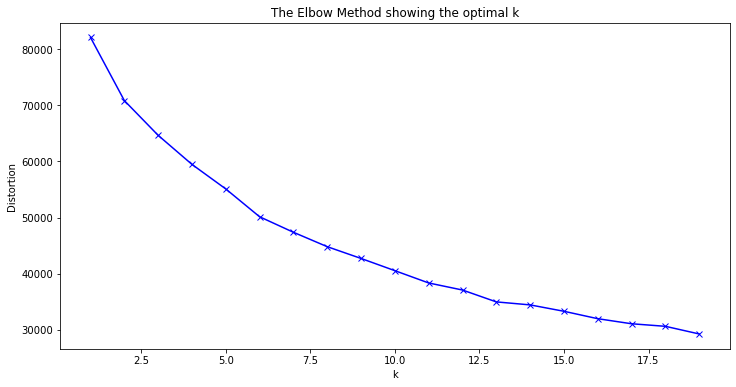

In [7]:
kmeans.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [8]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.6875               109.5591             1.0983              
----------------------------------------------------------------------------------------------------
#clusters=4          0.1587               87.5947              1.5795              
----------------------------------------------------------------------------------------------------
#clusters=7          0.0912               83.1827              1.4142              
----------------------------------------------------------------------------------------------------
#clusters=20         0.1022               65.842               1.312               
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [9]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.3772999942302704   529.5848             1.0522              
----------------------------------------------------------------------------------------------------
#clusters=4          0.40959998965263367  669.3017             0.8552              
----------------------------------------------------------------------------------------------------
#clusters=7          0.4311999976634979   820.1128             0.7192              
----------------------------------------------------------------------------------------------------
#clusters=20         0.41990000009536743  934.8797             0.7401              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


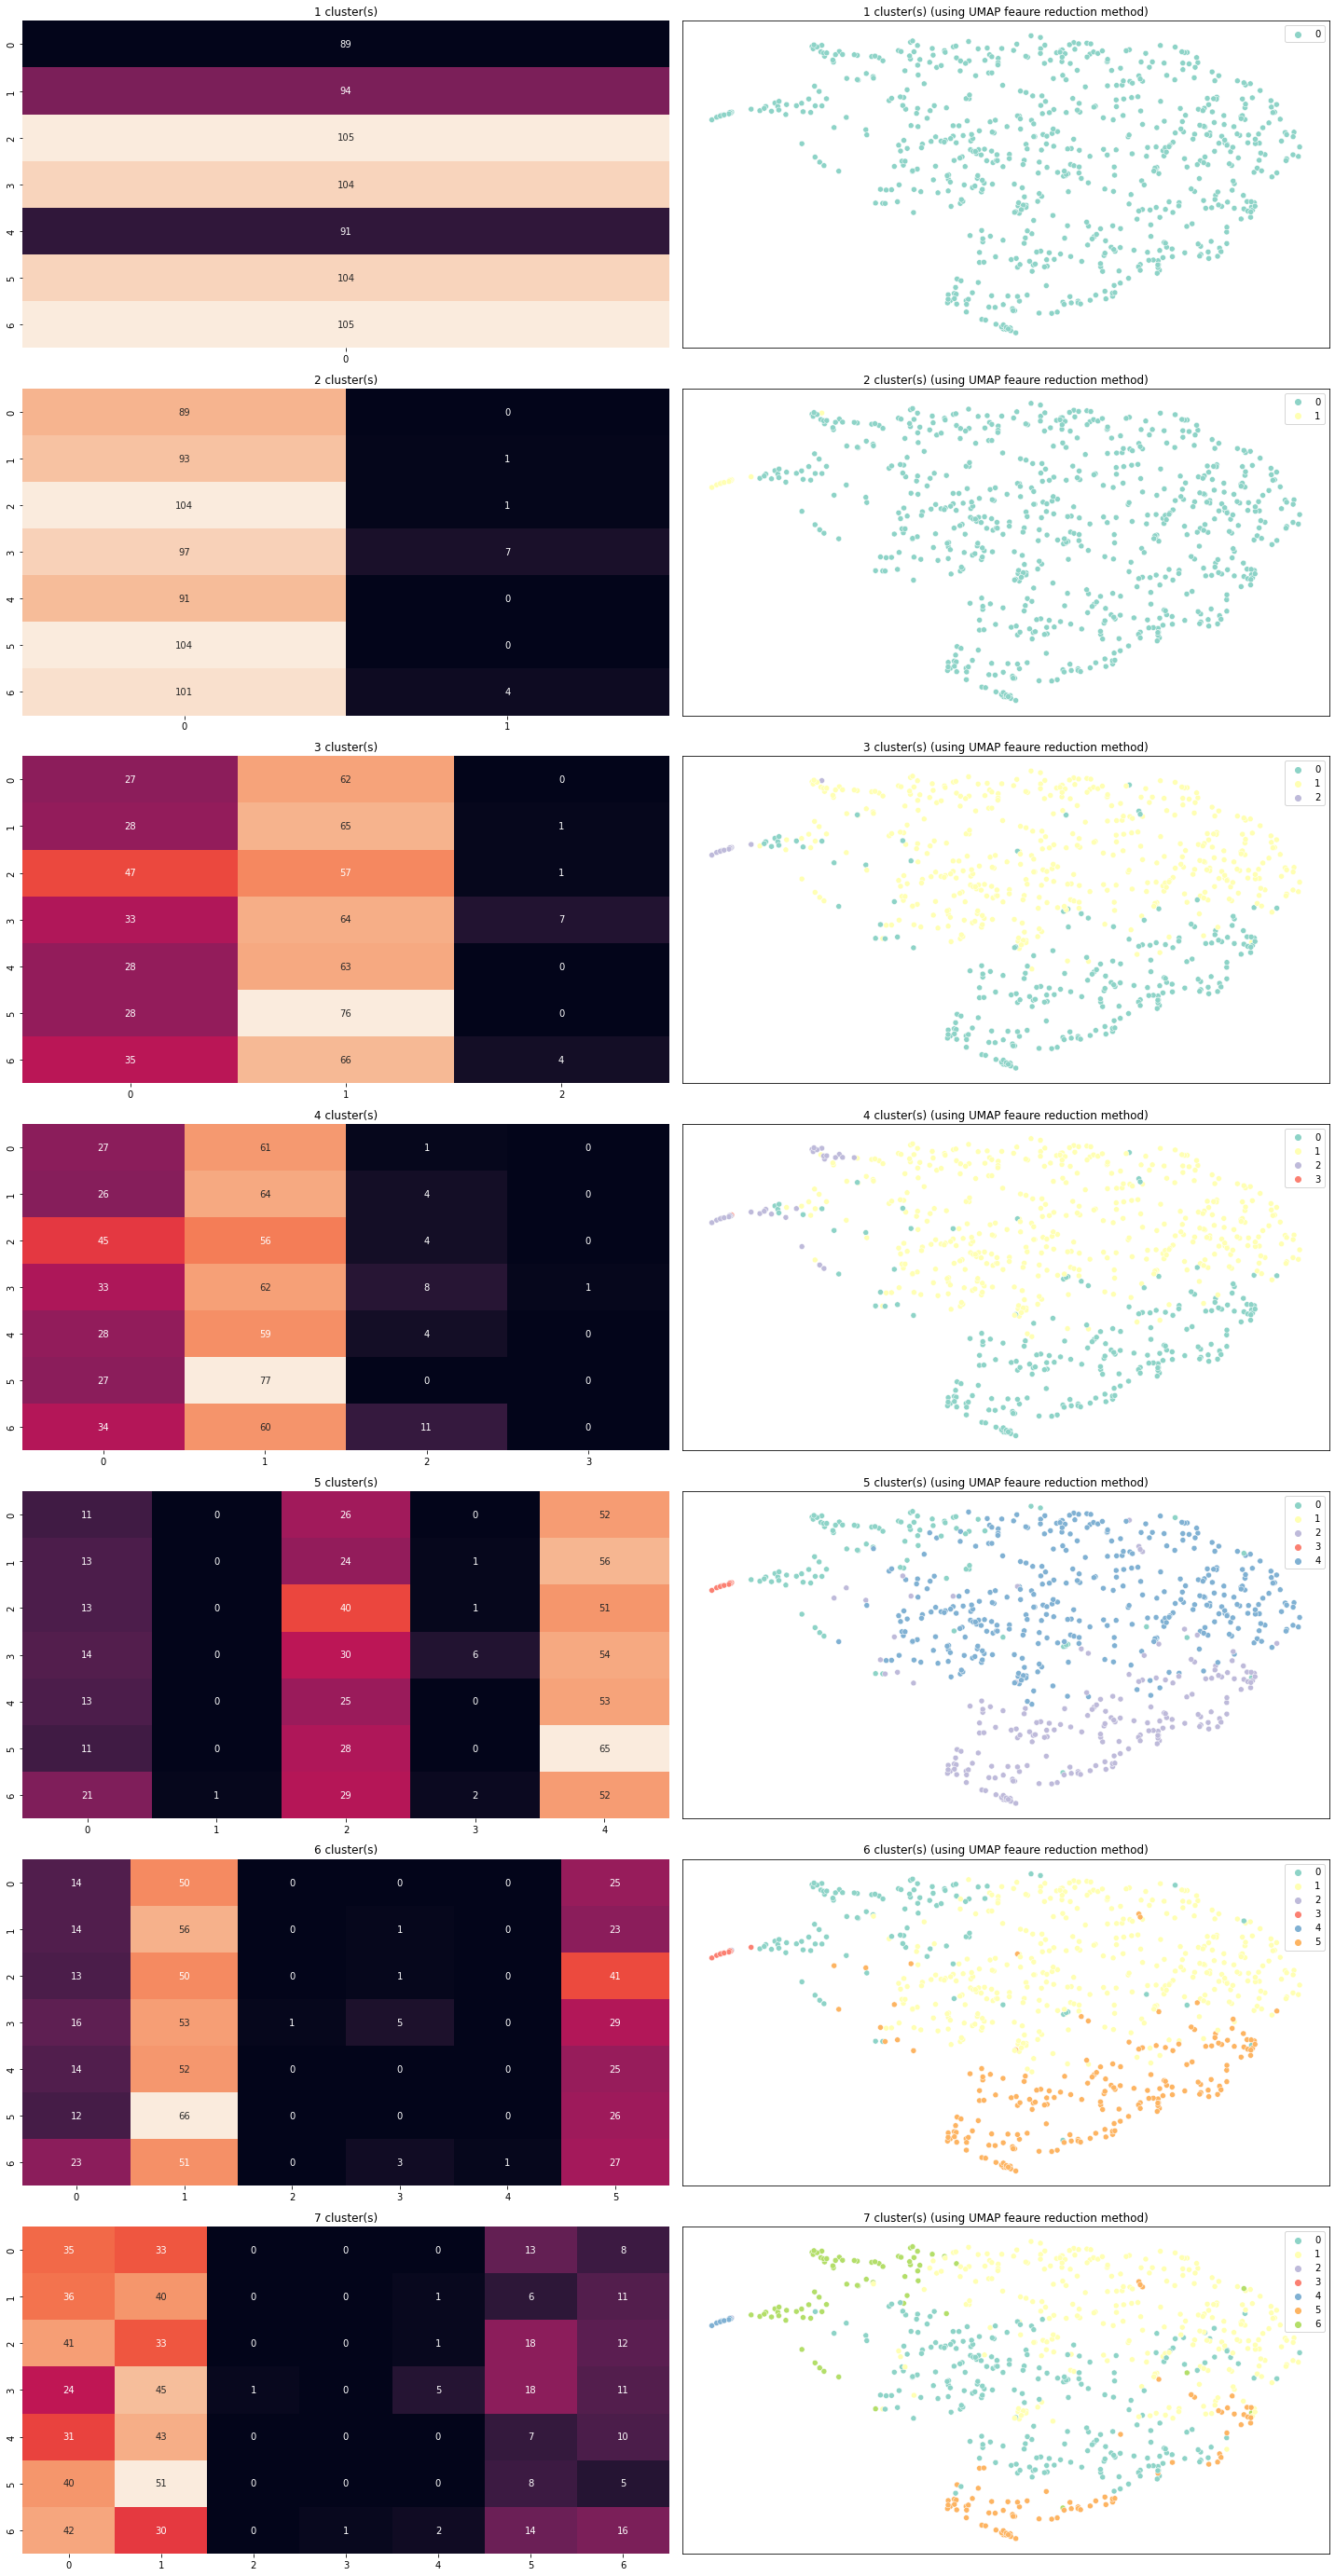

In [10]:
kmeans.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


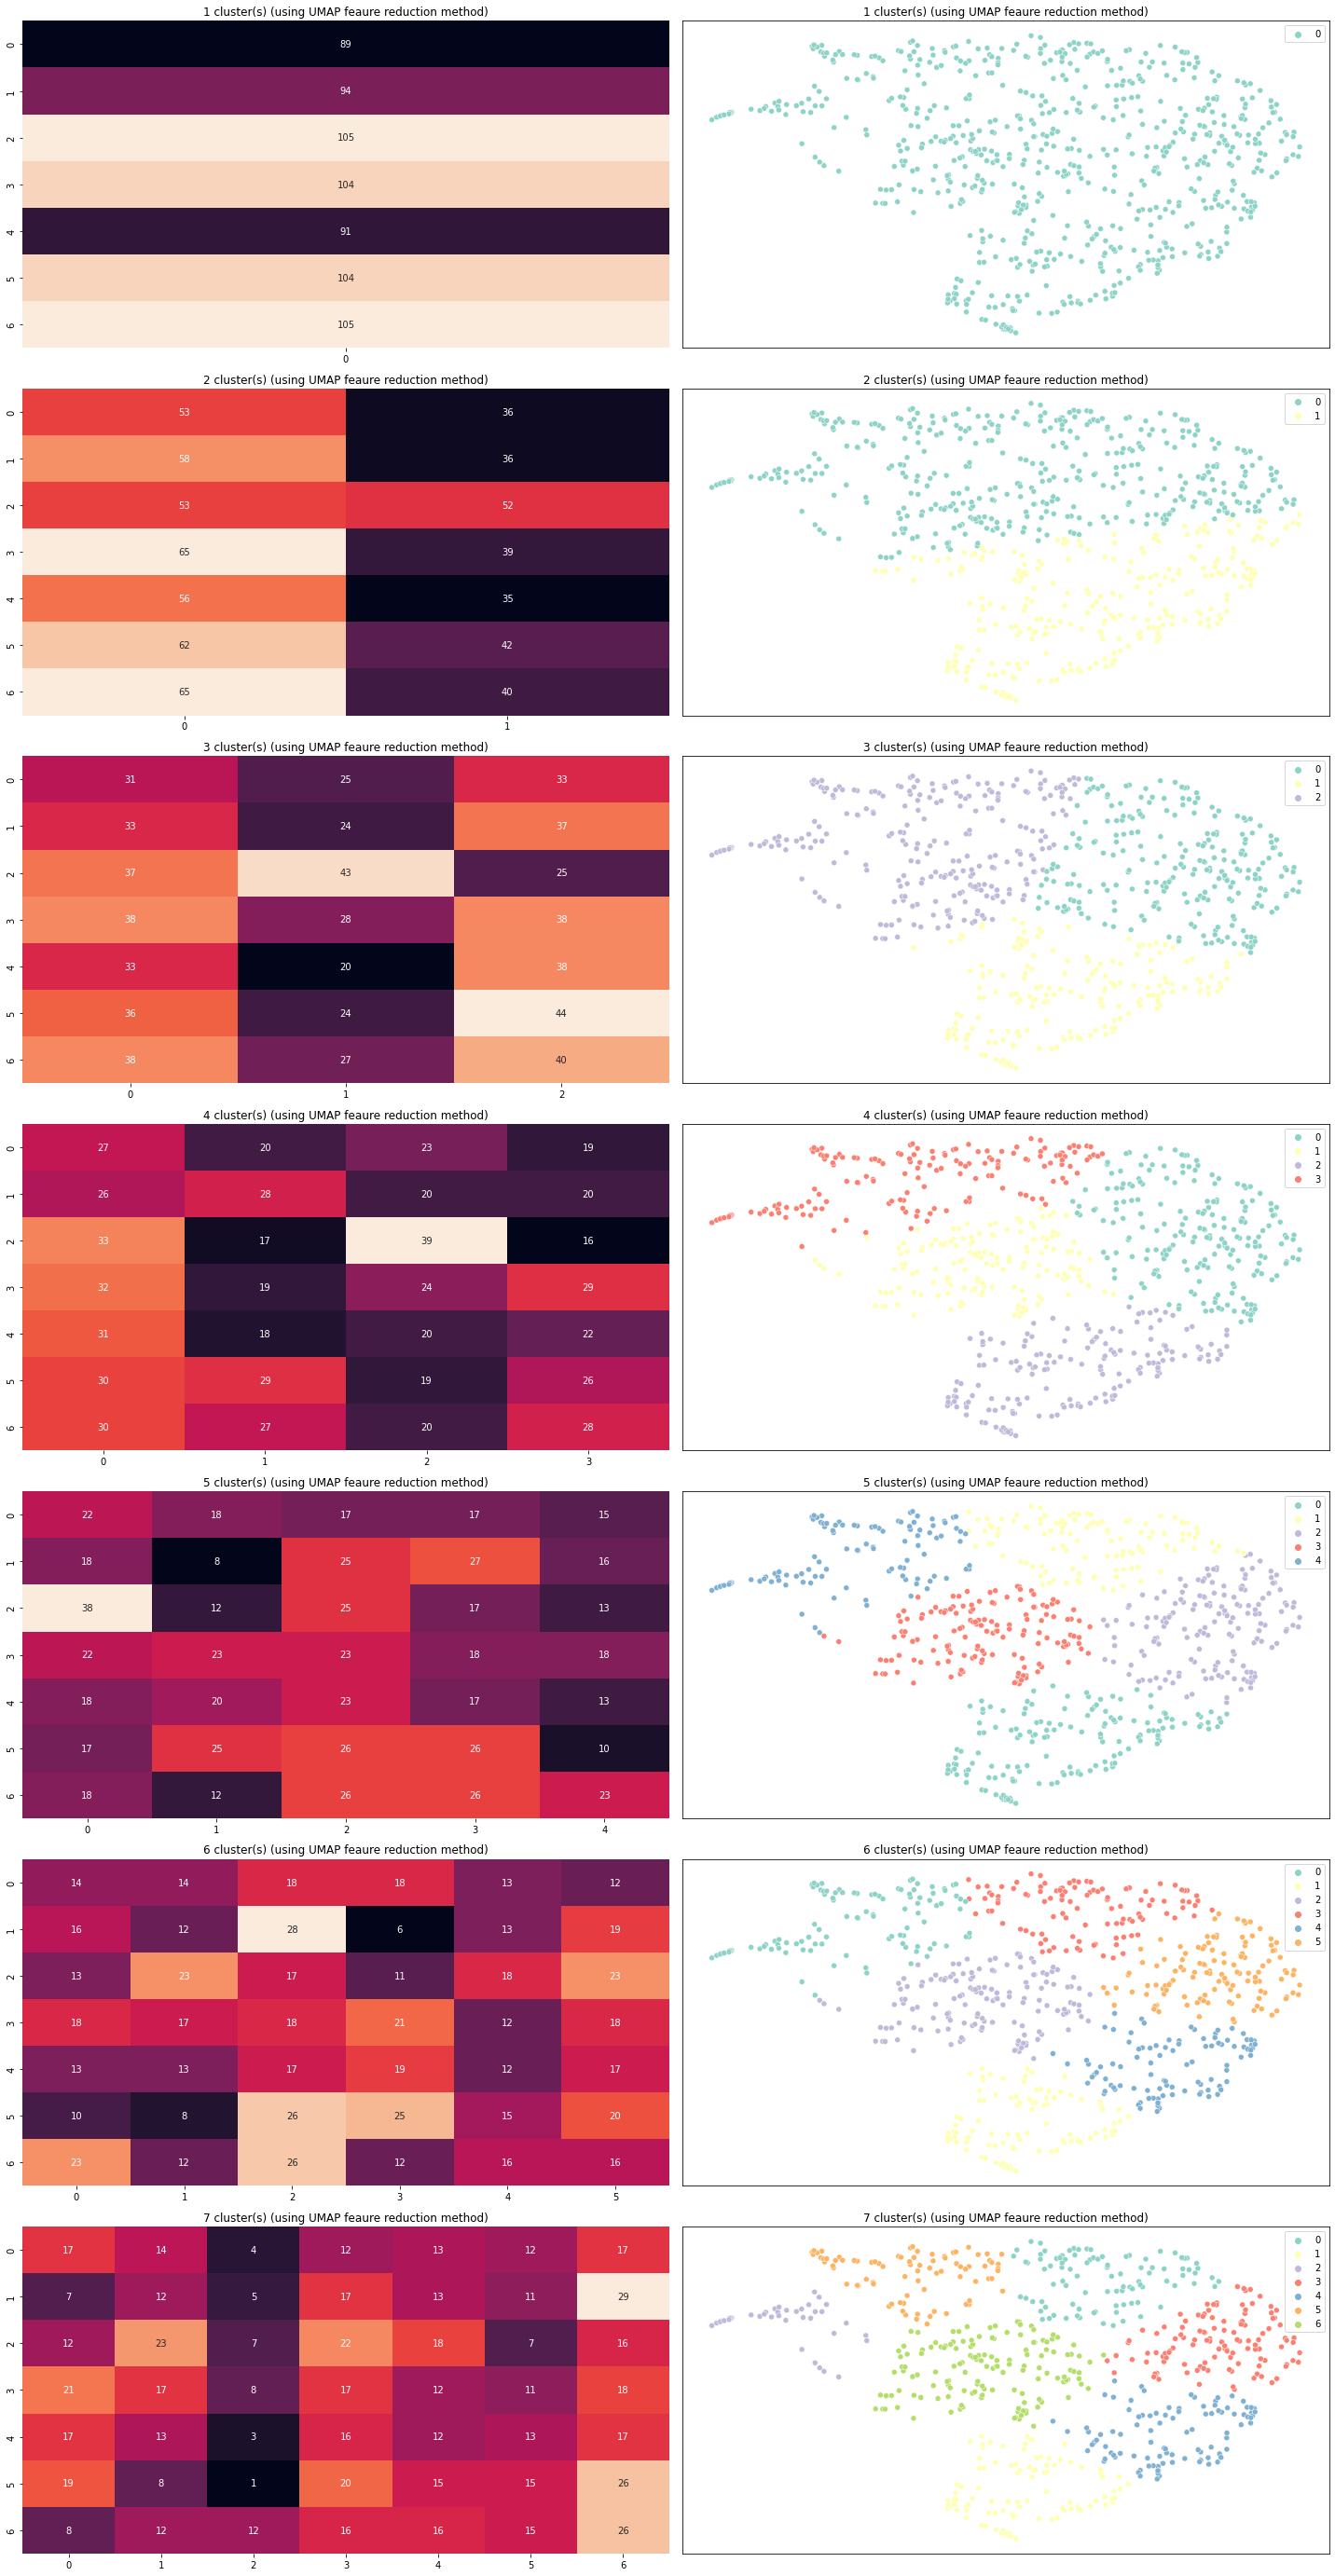

In [11]:
kmeans.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


In [12]:
feature_vectors.shape

(692, 10)

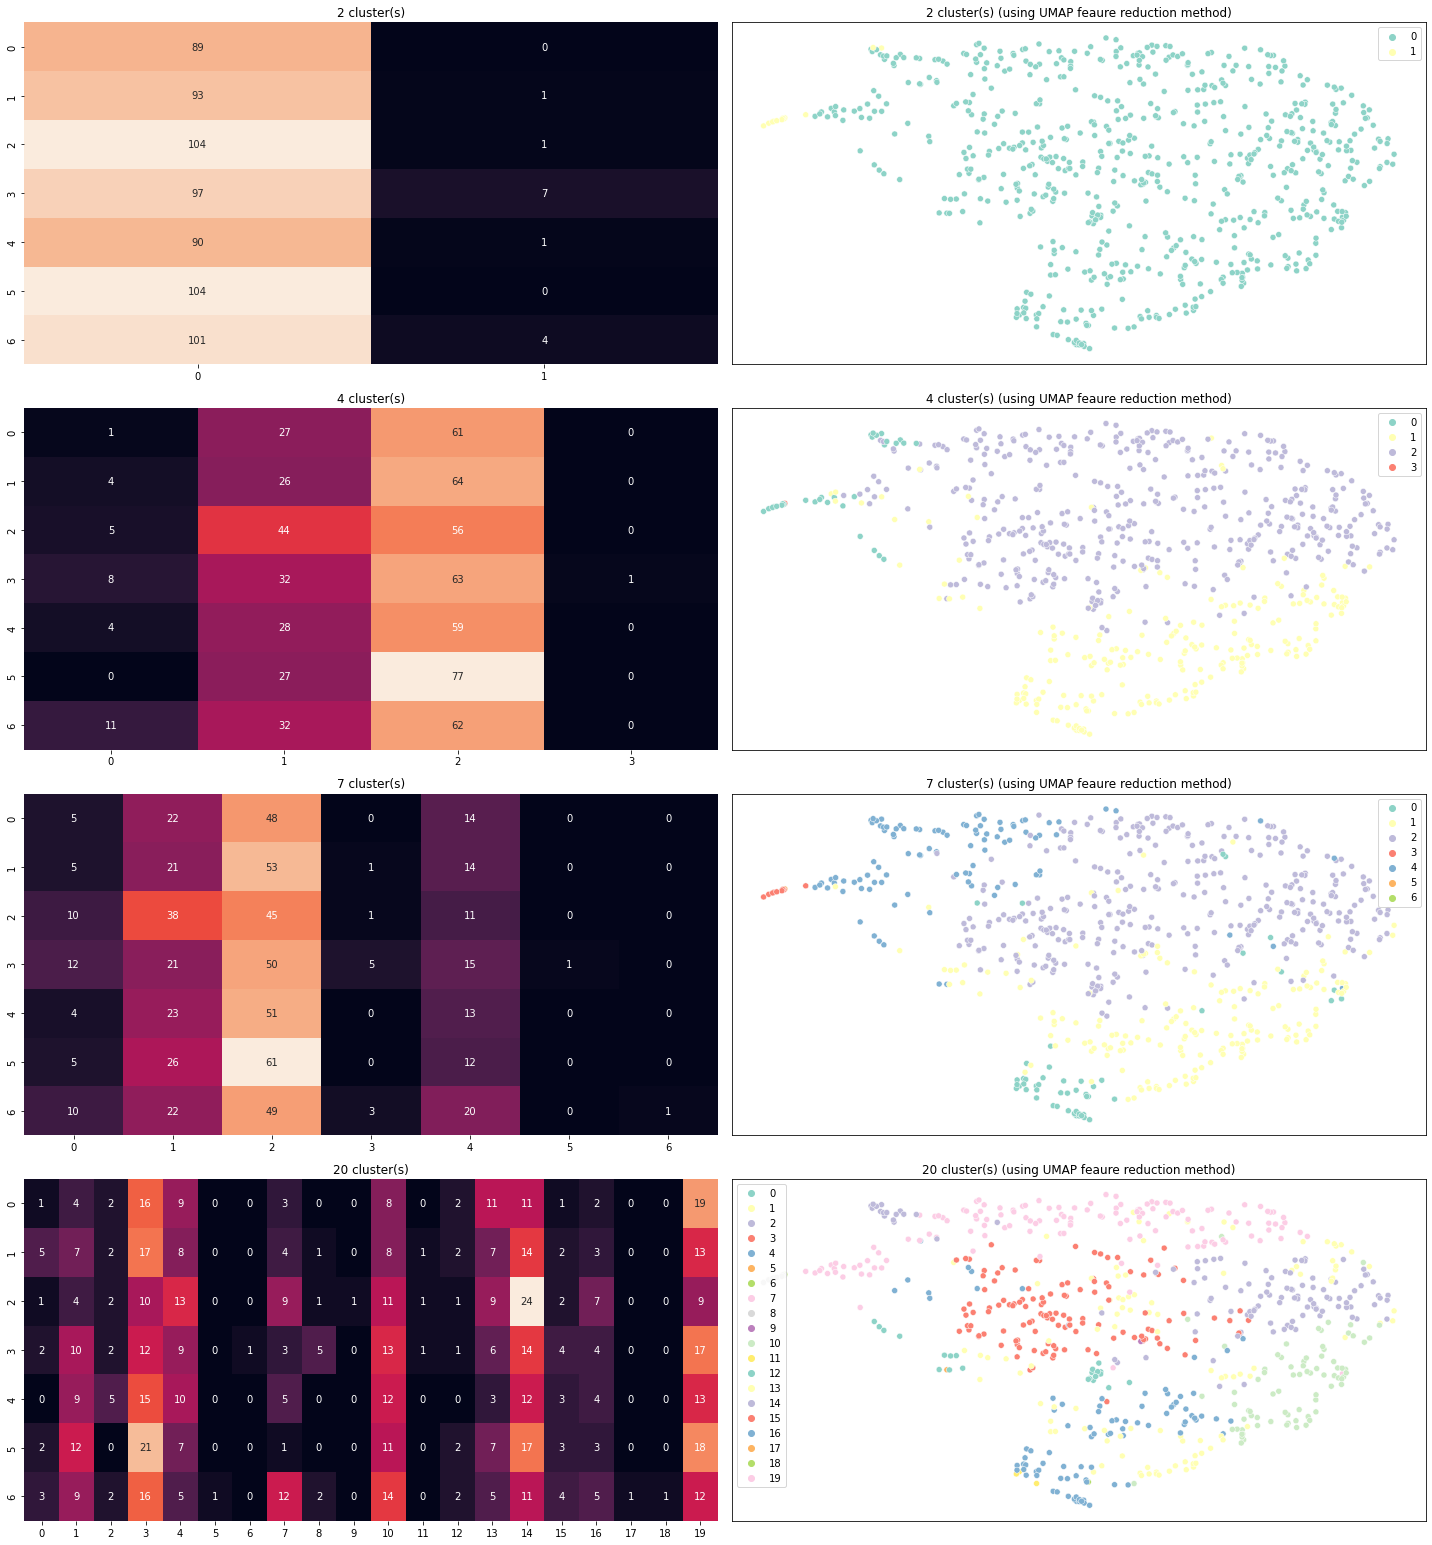

In [13]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


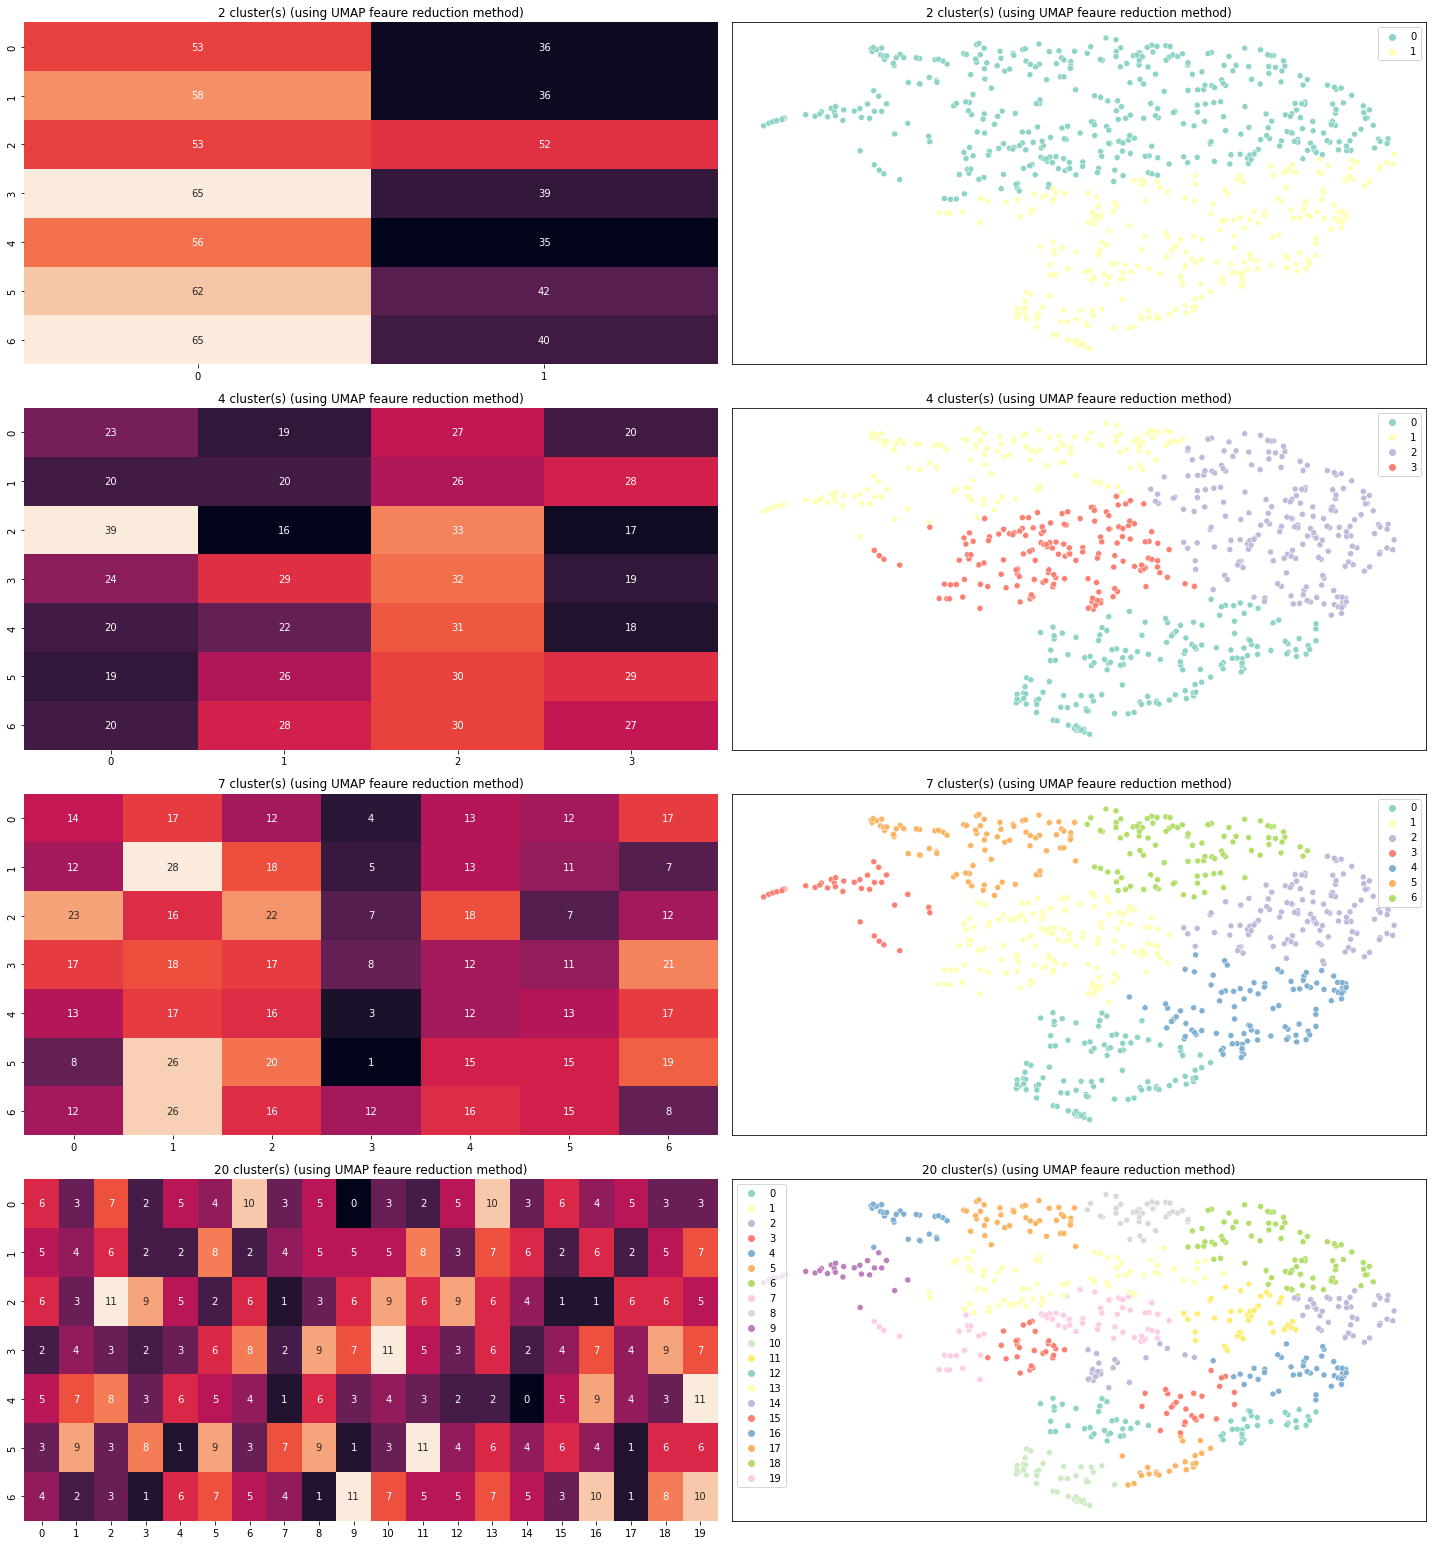

In [14]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=True)

<span style="color:orchid">
<font size="5">Kmeans Clustering with chroma_cqt and melspectrogram</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [15]:
dataset='591'
df=loaddata(
    features=["chroma_cqt","melspectrogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [16]:
from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [17]:
from Kmeans_model import *
kmeans = Kmeans_Clustering(feature_vectors,y)

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


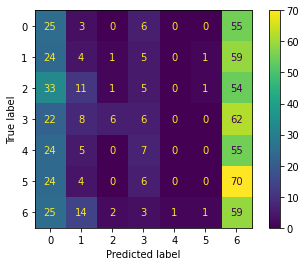

In [18]:
kmeans.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


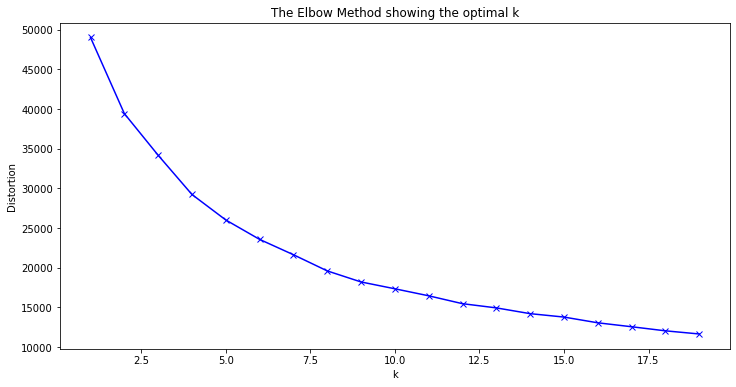

In [19]:
kmeans.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [20]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.7562               173.3825             0.8411              
----------------------------------------------------------------------------------------------------
#clusters=4          0.4146               155.2104             1.2277              
----------------------------------------------------------------------------------------------------
#clusters=7          0.3148               145.4444             0.9911              
----------------------------------------------------------------------------------------------------
#clusters=20         0.1867               115.0128             1.0435              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [21]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.37959998846054077  491.017              1.0401              
----------------------------------------------------------------------------------------------------
#clusters=4          0.4650000035762787   879.5238             0.7365              
----------------------------------------------------------------------------------------------------
#clusters=7          0.41780000925064087  827.2171             0.7692              
----------------------------------------------------------------------------------------------------
#clusters=20         0.44530001282691956  1152.9255            0.7296              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


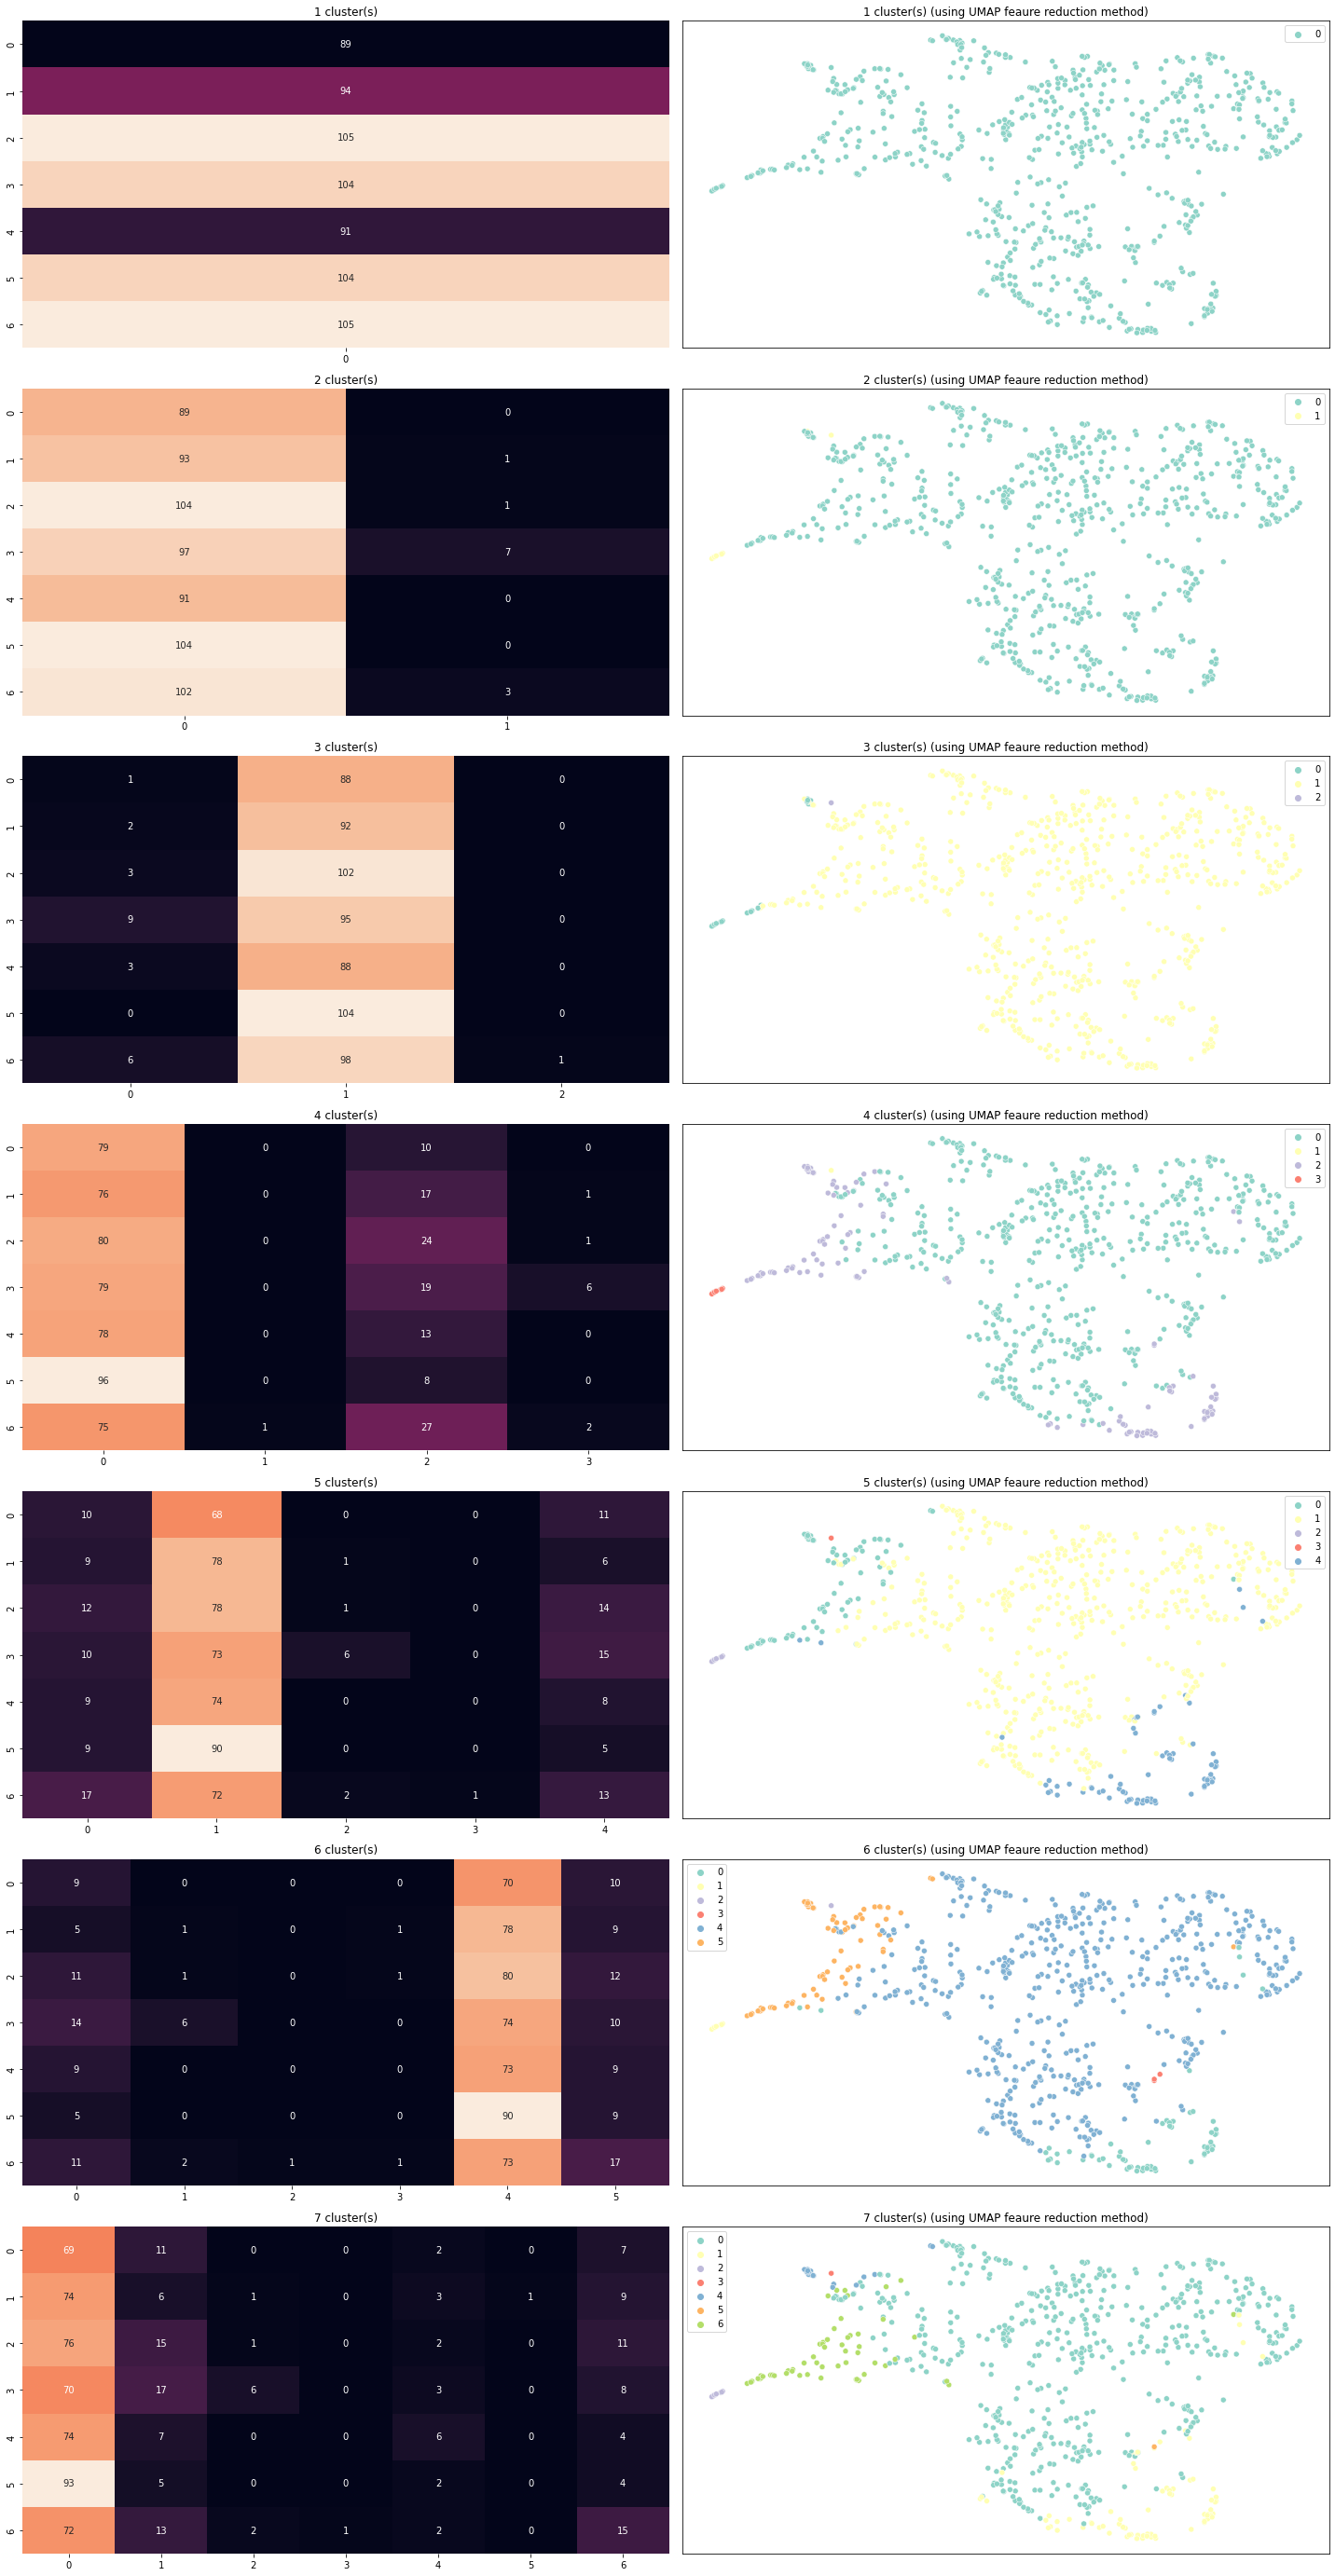

In [22]:
kmeans.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


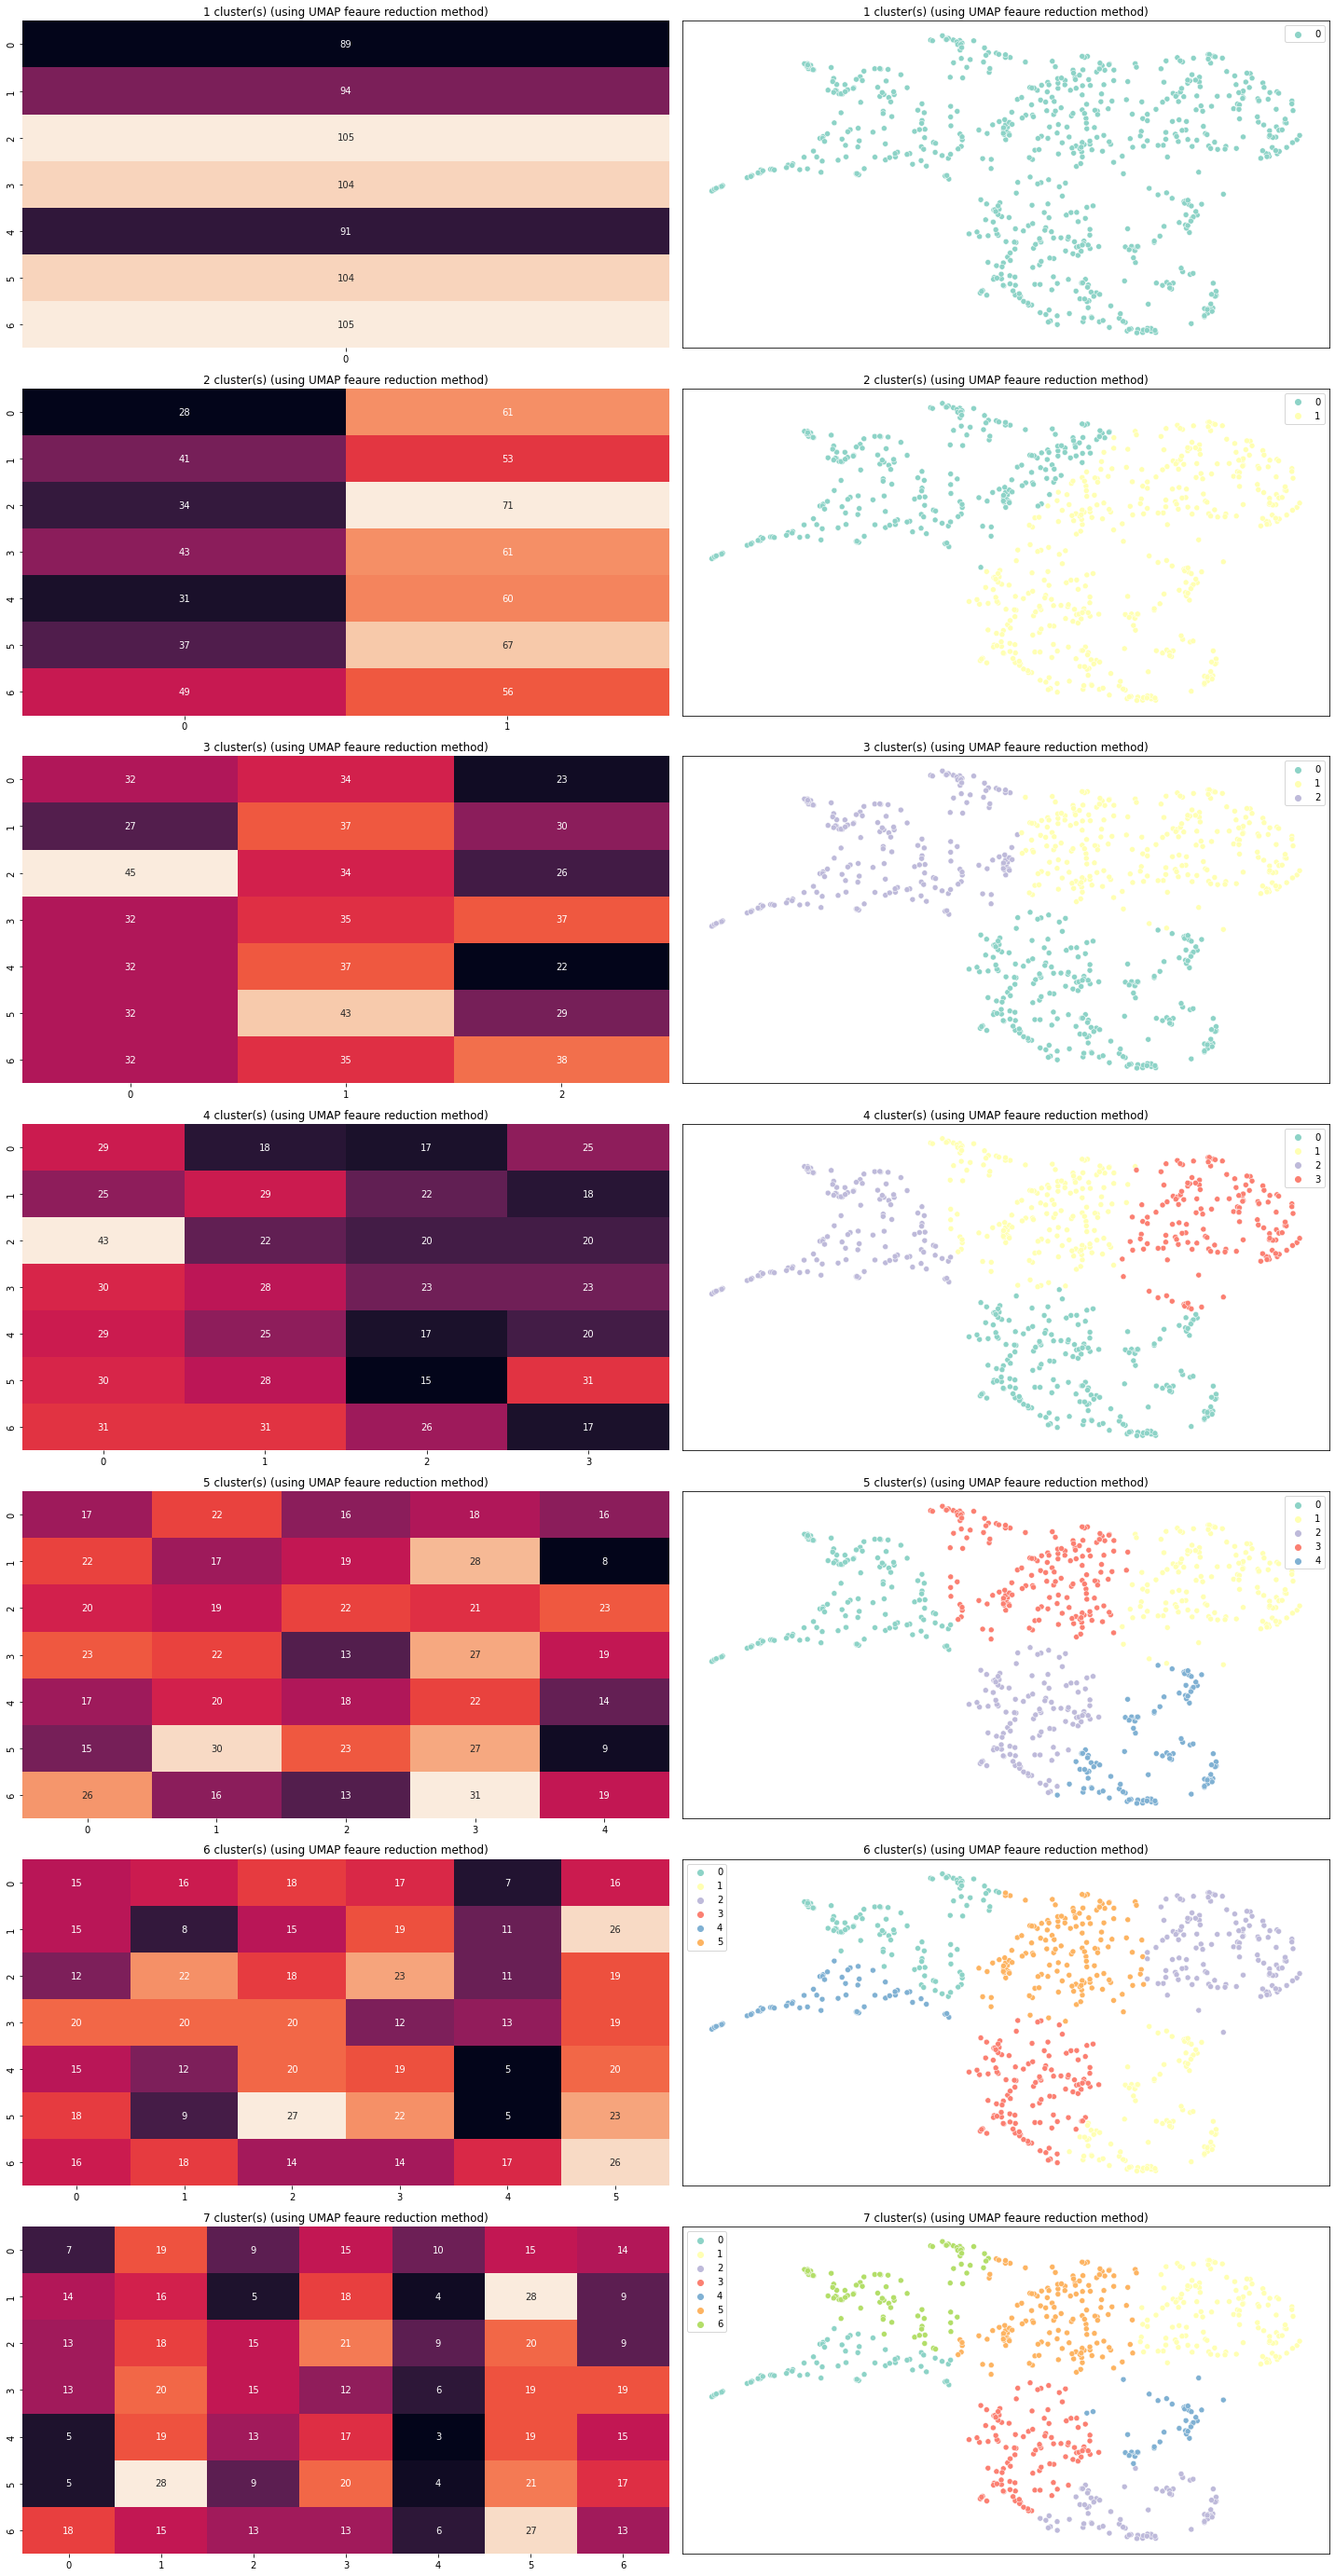

In [23]:
kmeans.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


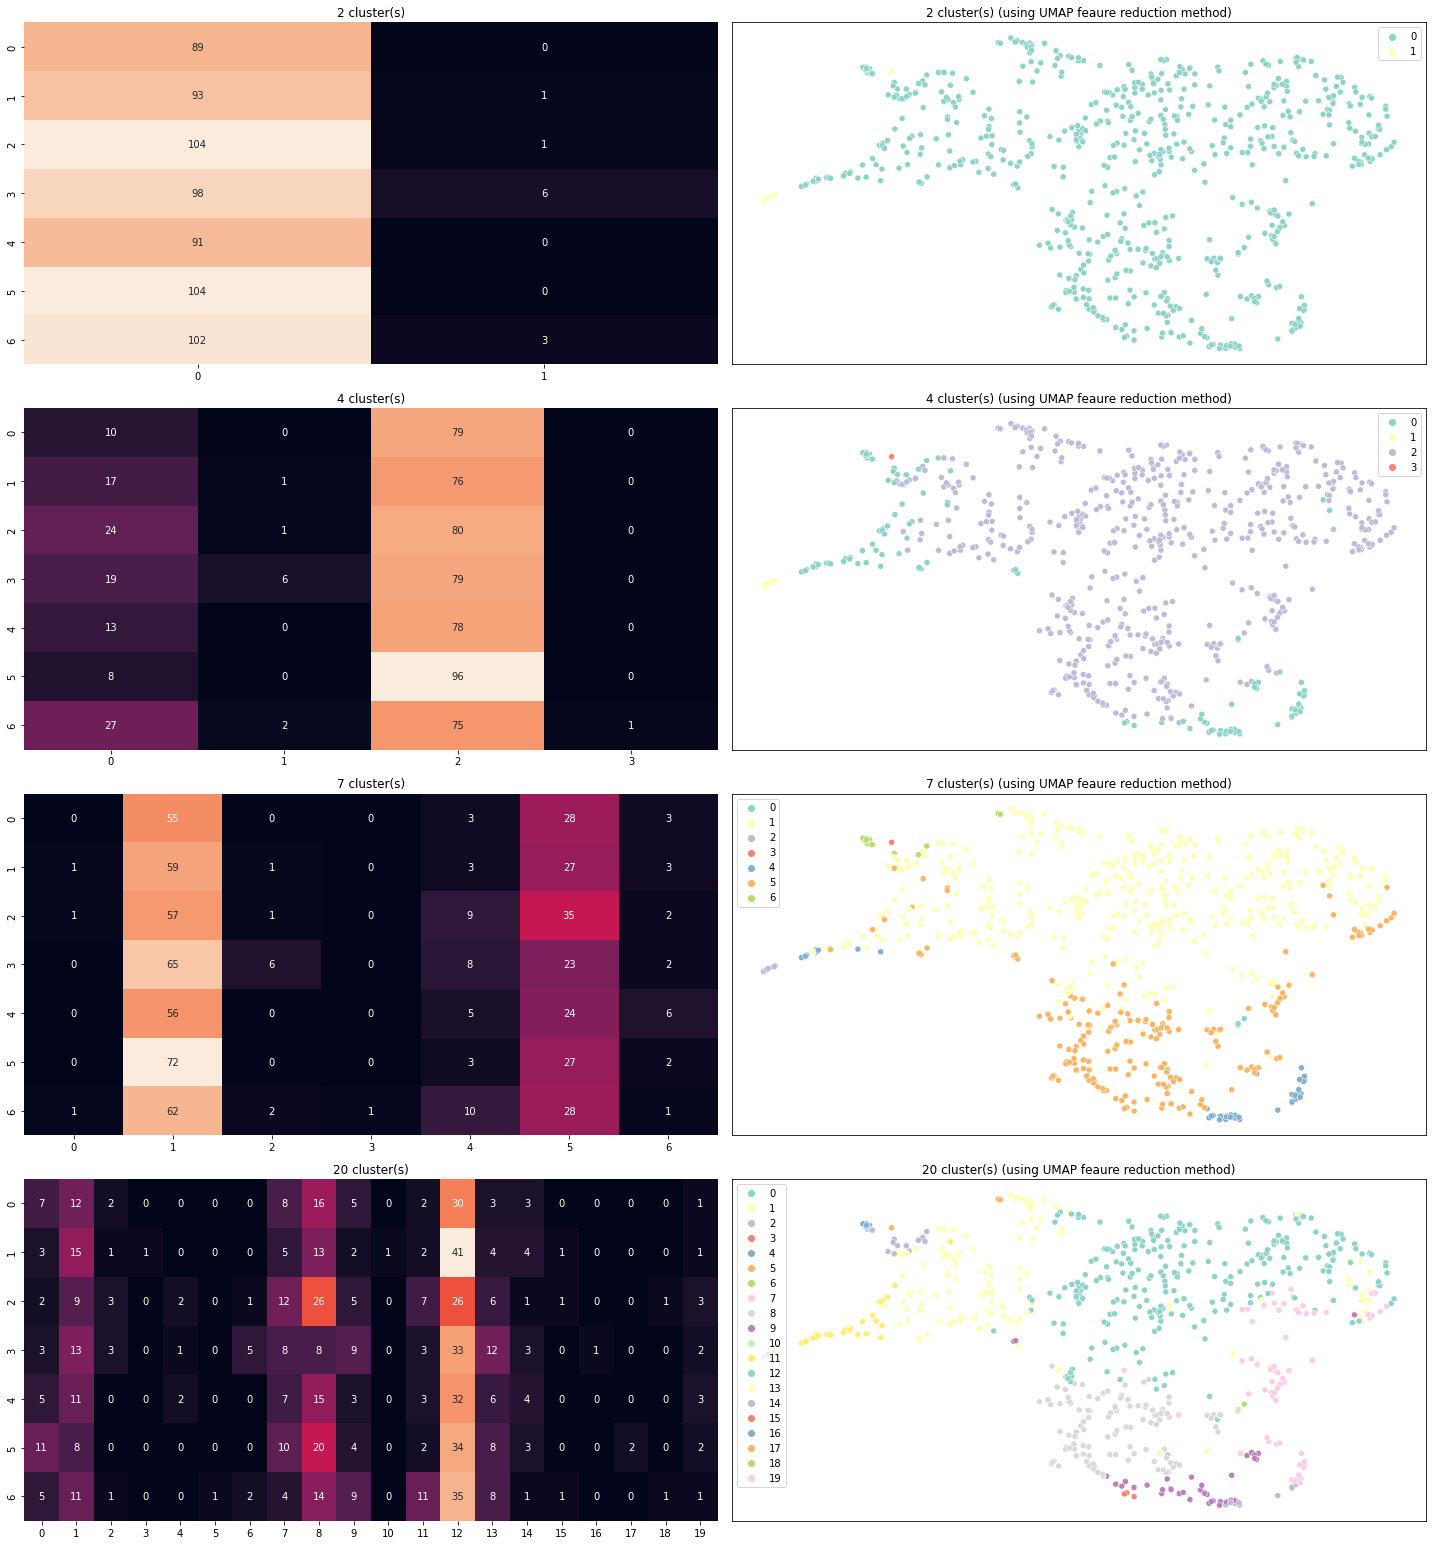

In [24]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


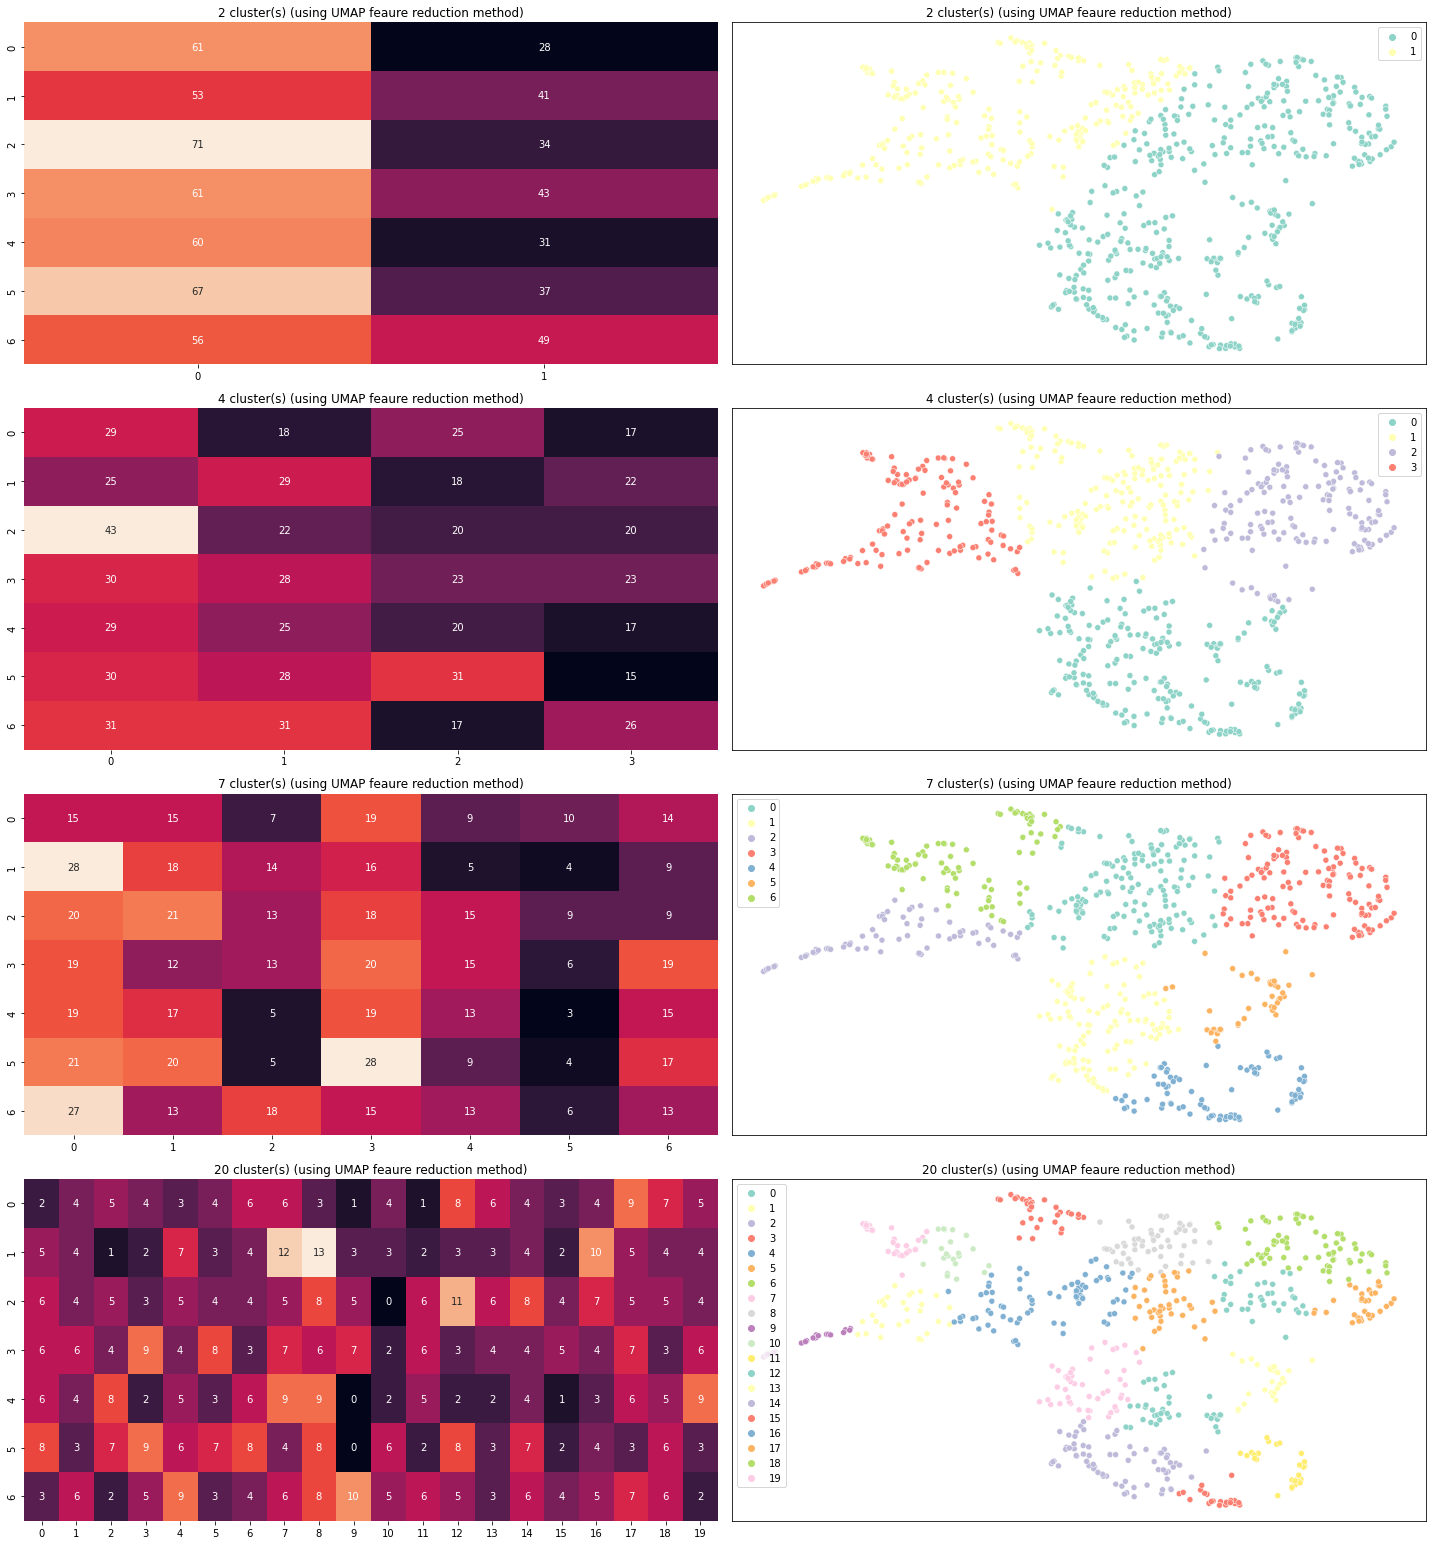

In [25]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=True)

<span style="color:orchid">
<font size="5">Kmeans Clustering with fourier_tempogram</font>
</span> 


<span style="color:DodgerBlue">
<font size="4">Reading from files</font>
</span> 

In [26]:
dataset='591'
df=loaddata(features=["fourier_tempogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [27]:
from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:DodgerBlue">
<font size="4">Creating object</font>
</span> 


In [28]:
from Kmeans_model import *
kmeans = Kmeans_Clustering(feature_vectors,y)

<span style="color:DodgerBlue">
<font size="4">Confusion Matrix</font>
</span> 

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


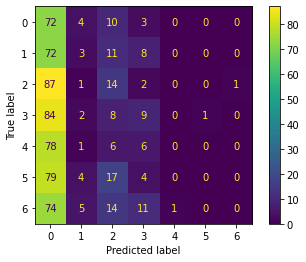

In [29]:
kmeans.printConfusionMatrix()

<span style="color:DodgerBlue">
<font size="4">Elbow method to reach optimal K</font>
</span> 

e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


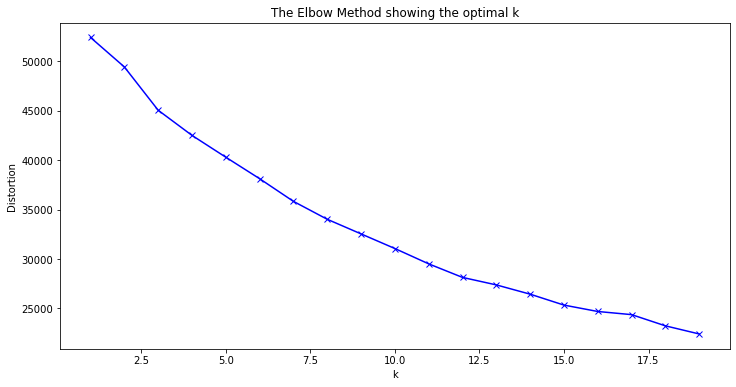

In [30]:
kmeans.elbow(rangeOfClusters=20)

<span style="color:DodgerBlue">
<font size="4">Print metrics results with original data</font>
</span> 


In [31]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.5512               43.5857              2.5841              
----------------------------------------------------------------------------------------------------
#clusters=4          0.2995               40.7241              1.7819              
----------------------------------------------------------------------------------------------------
#clusters=7          0.0825               52.4255              1.7601              
----------------------------------------------------------------------------------------------------
#clusters=20         0.0503               49.1211              1.2201              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [32]:
clusters = [2, 4, 7, 20]
kmeans.printDataMetrics(arr= clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.3578999936580658   458.238              1.1293              
----------------------------------------------------------------------------------------------------
#clusters=4          0.3743000030517578   594.6322             0.8538              
----------------------------------------------------------------------------------------------------
#clusters=7          0.39989998936653137  686.3189             0.7682              
----------------------------------------------------------------------------------------------------
#clusters=20         0.384799987077713    728.4615             0.7903              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


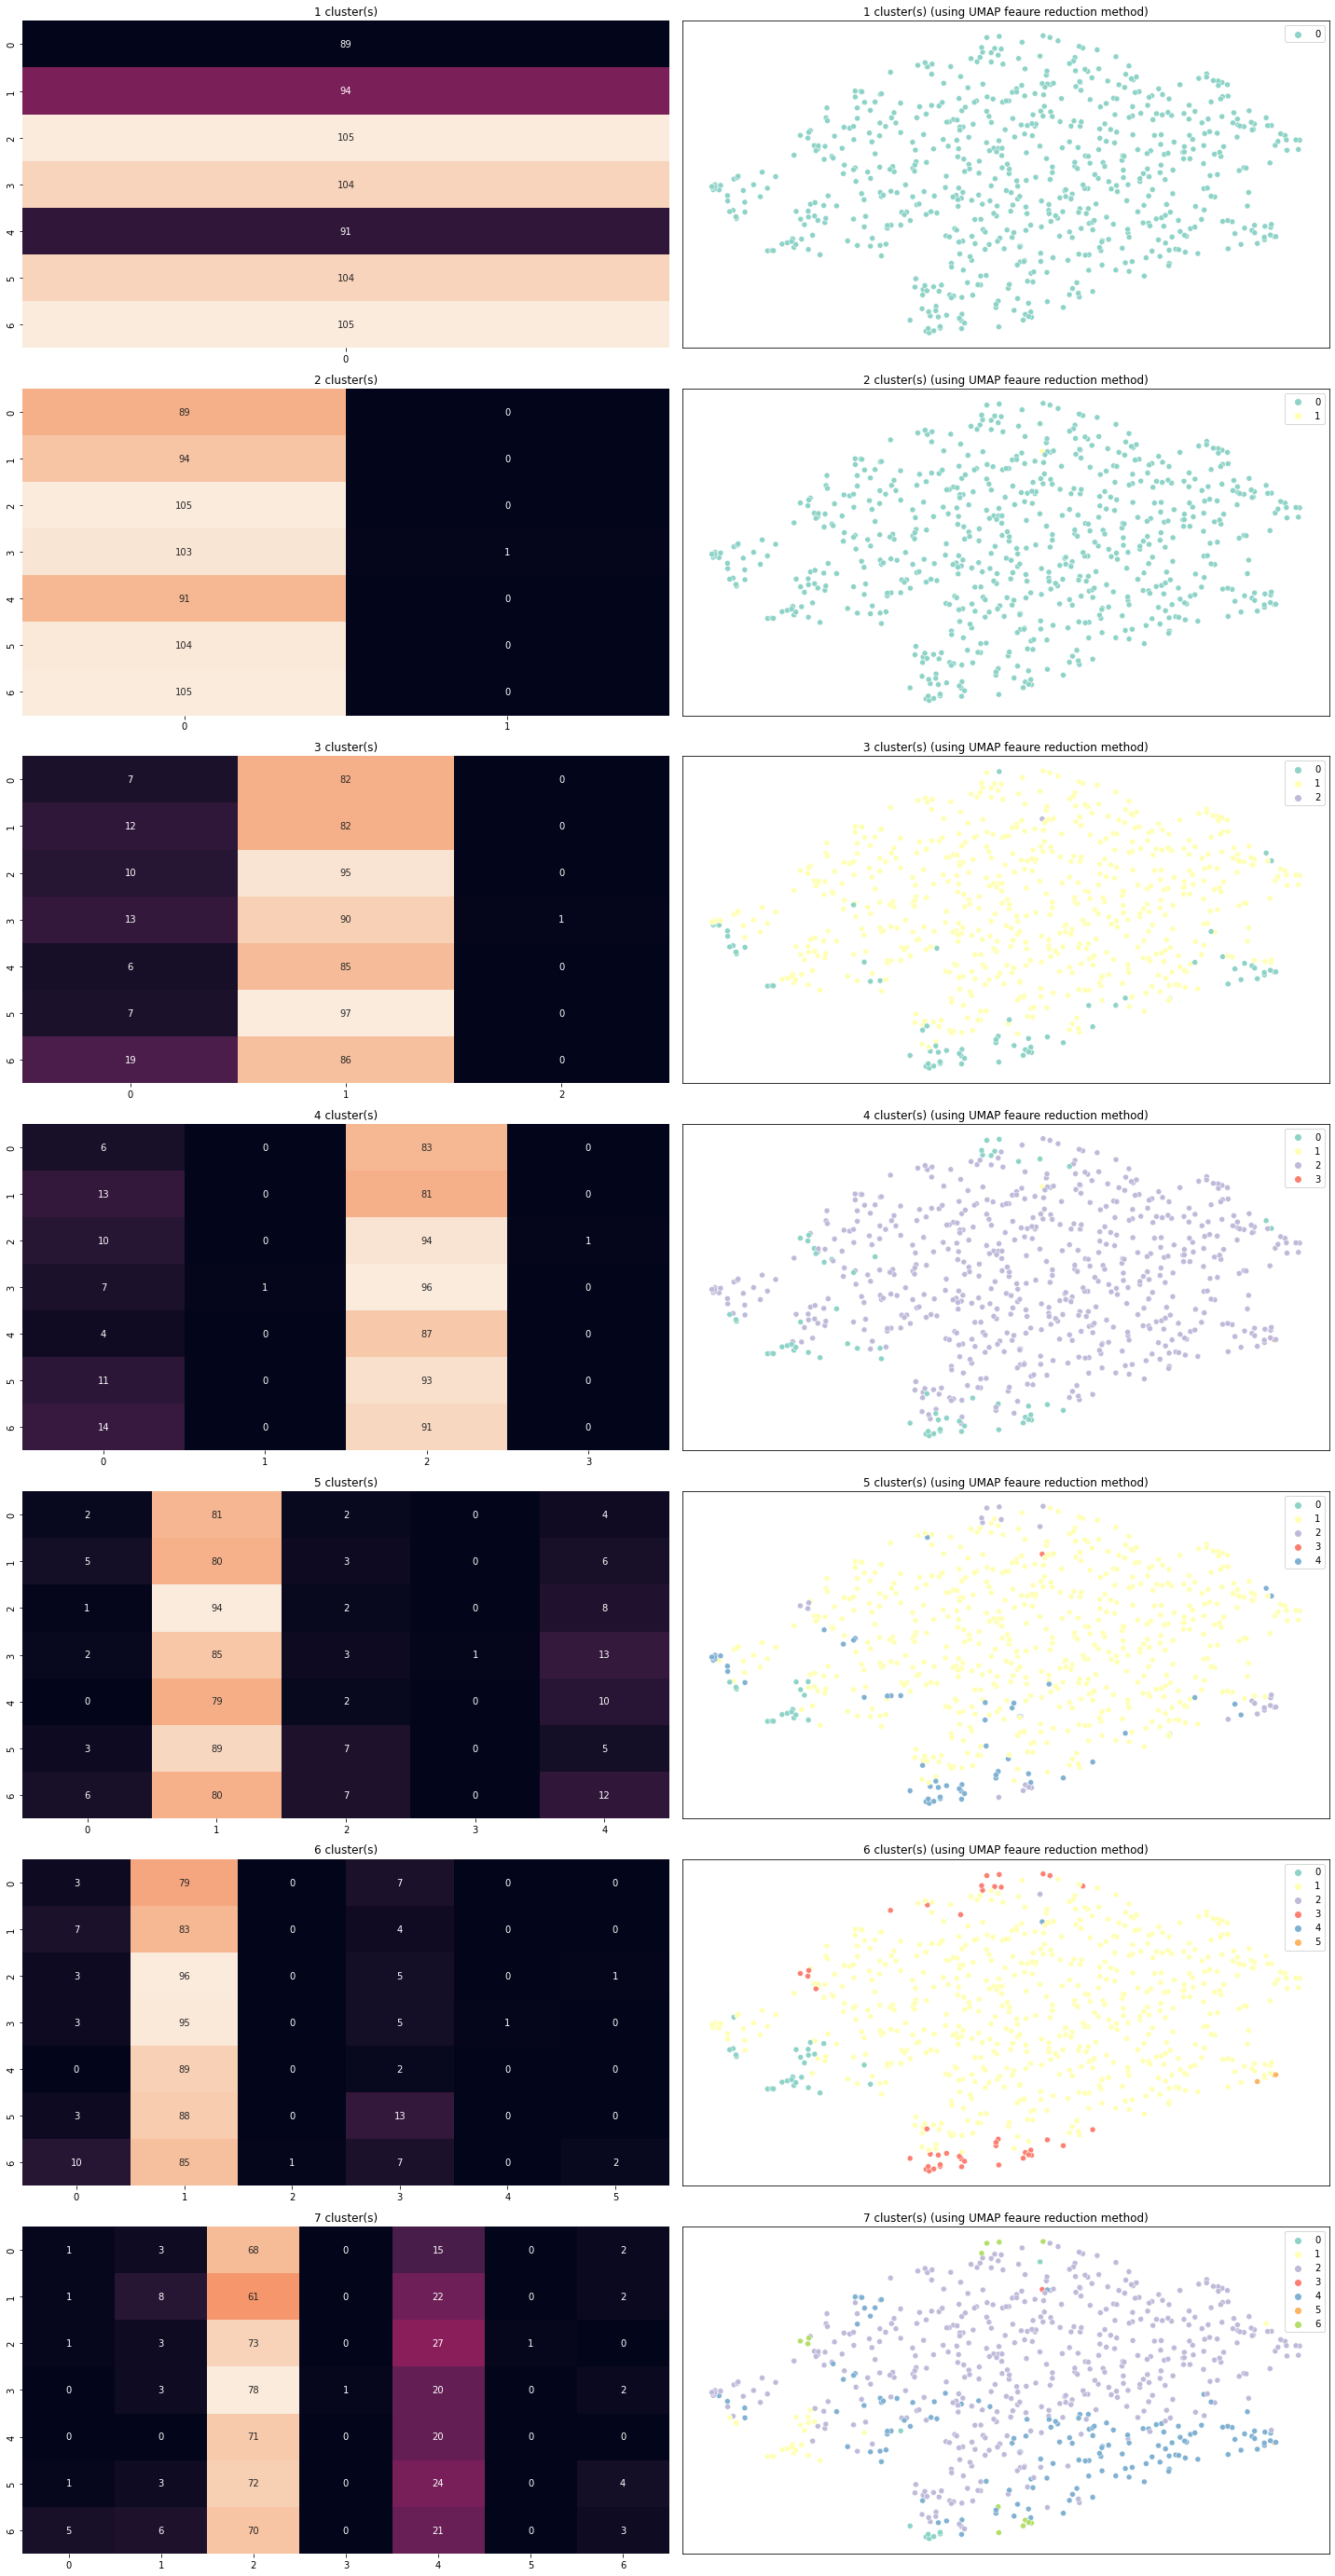

In [33]:
kmeans.plotClusters(nClusters=7, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\ProgramFiles\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


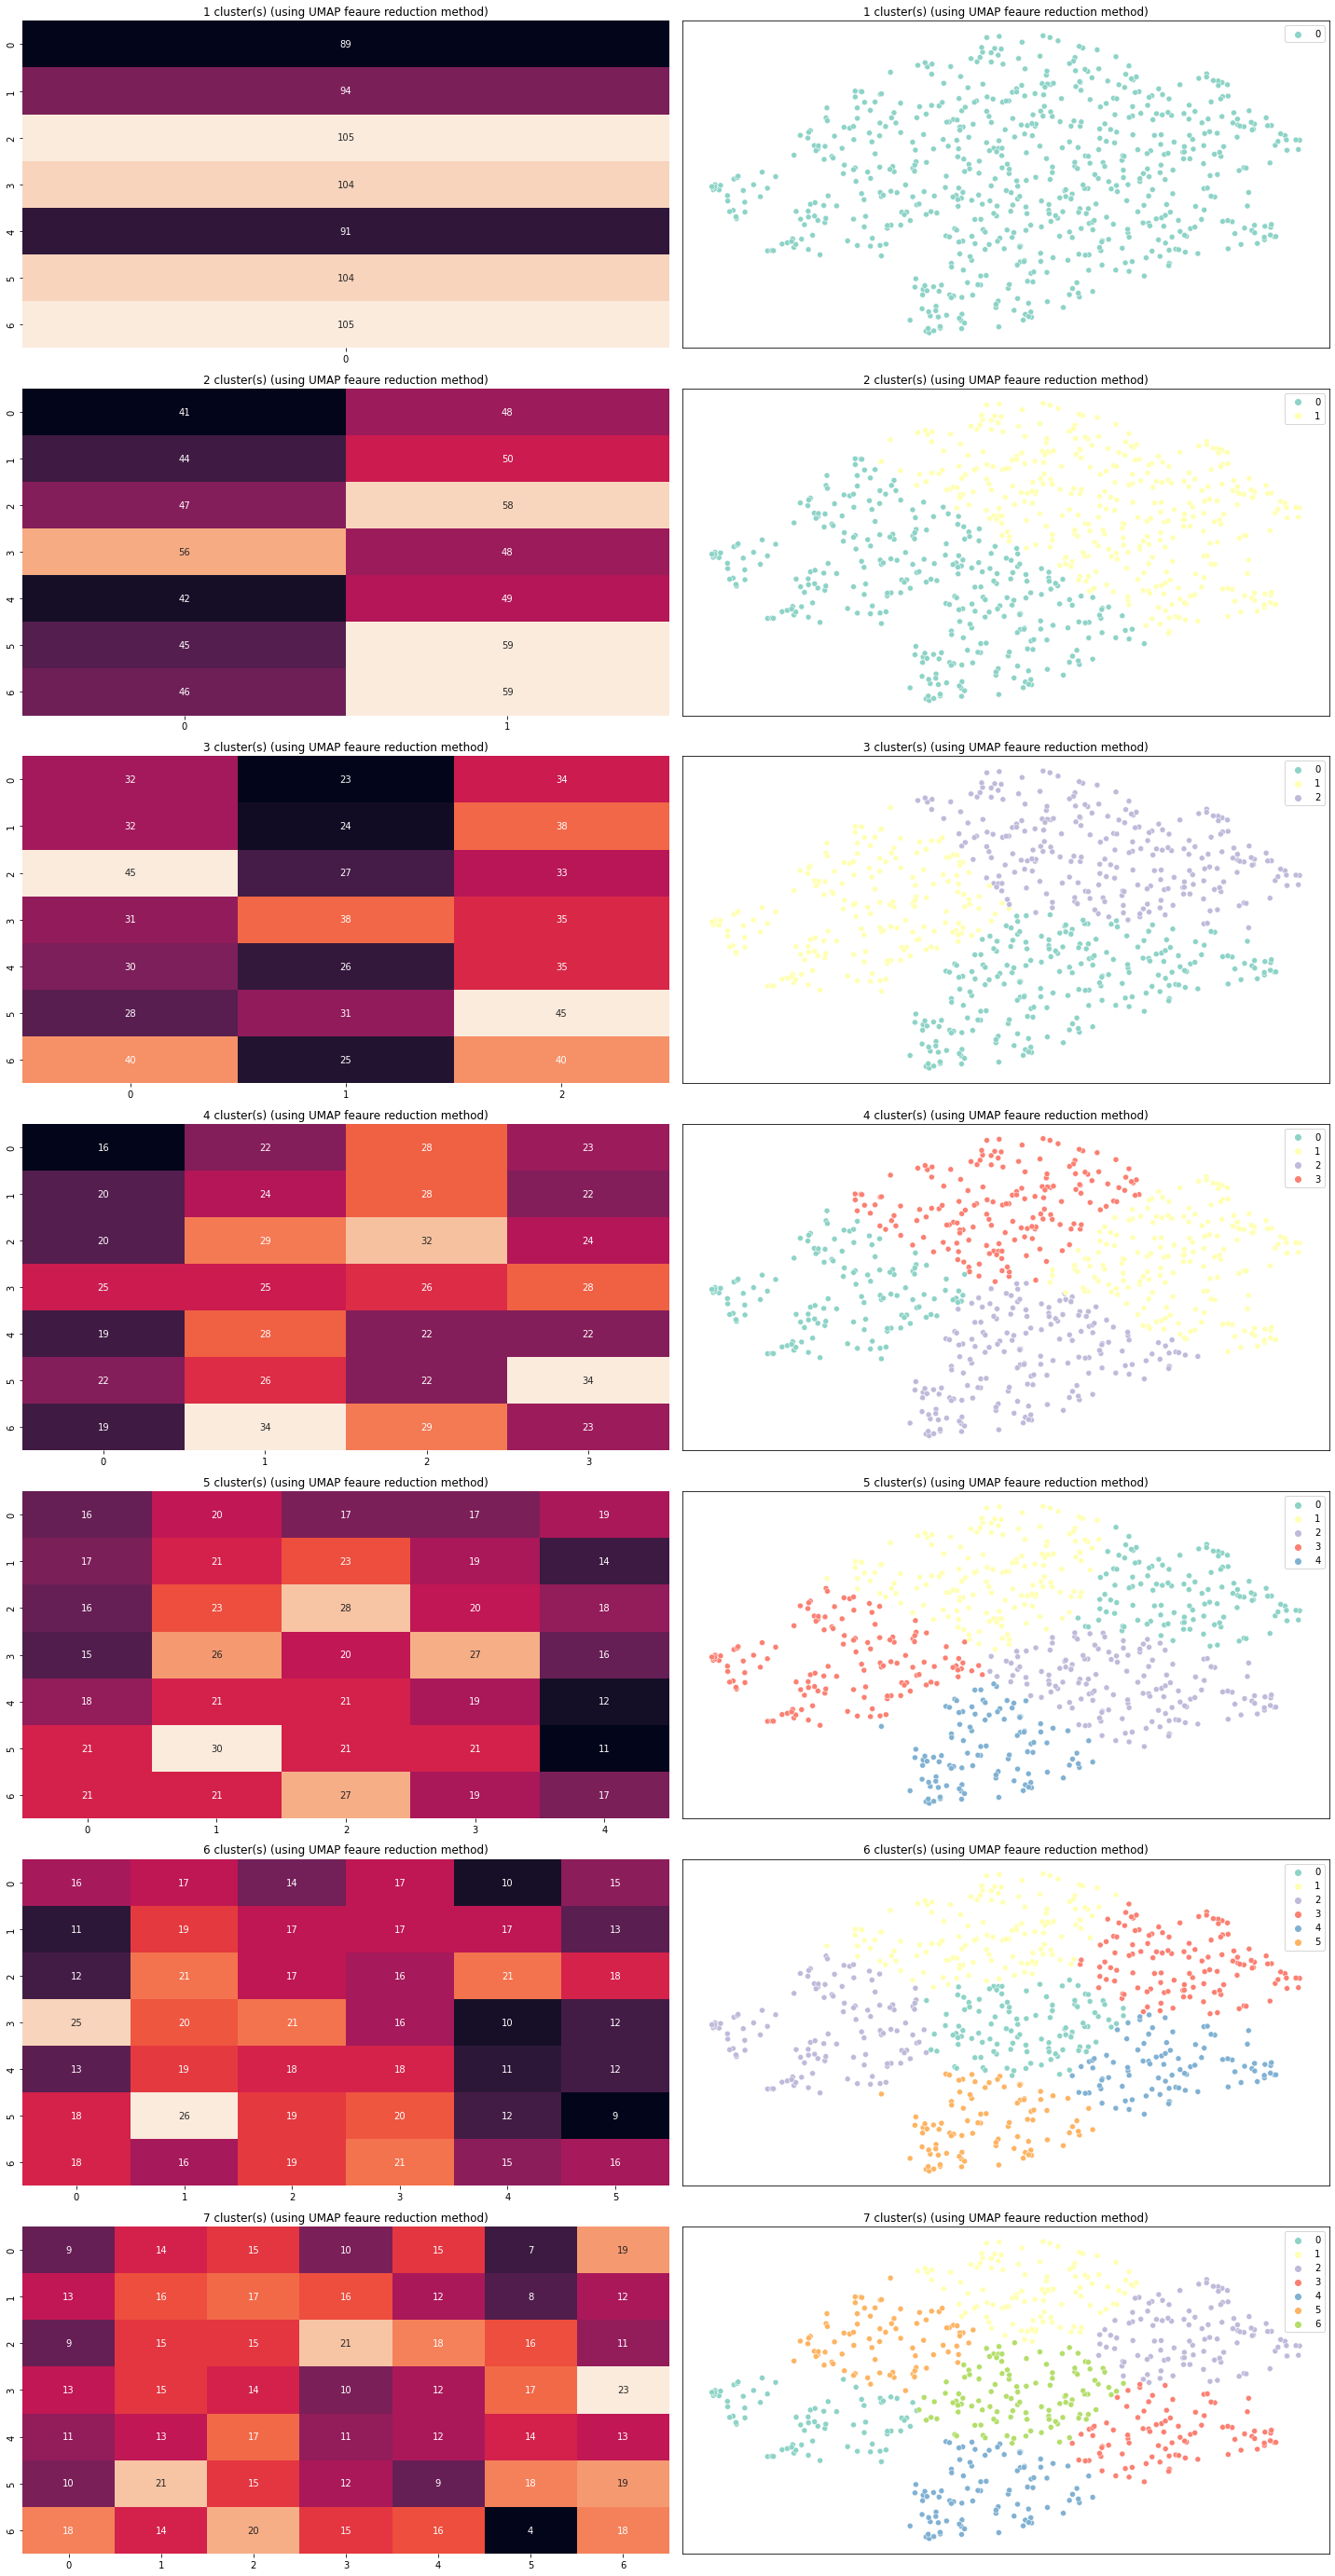

In [34]:
kmeans.plotClusters(nClusters=7, fReduction=True)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with original data </font>
</span> 


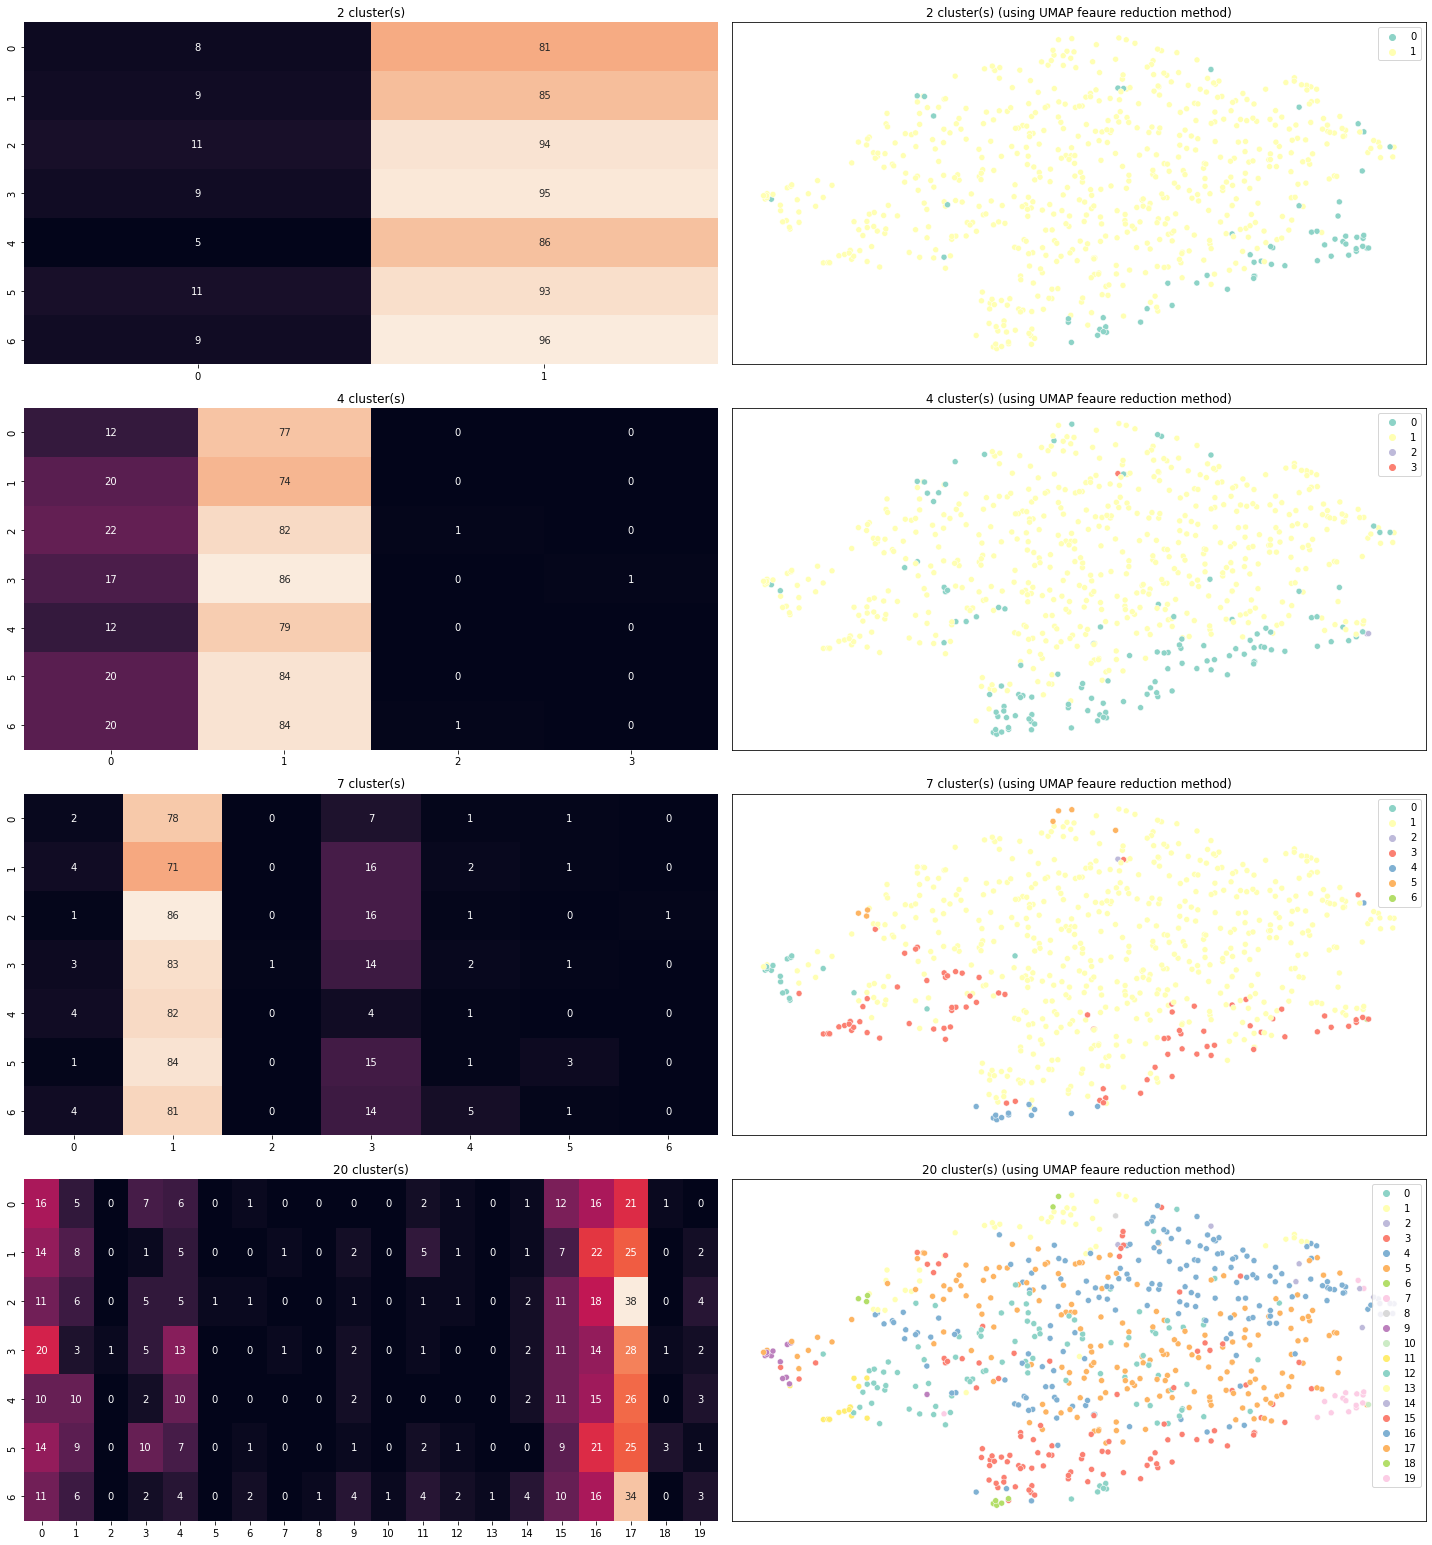

In [35]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=False)

<span style="color:DodgerBlue">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


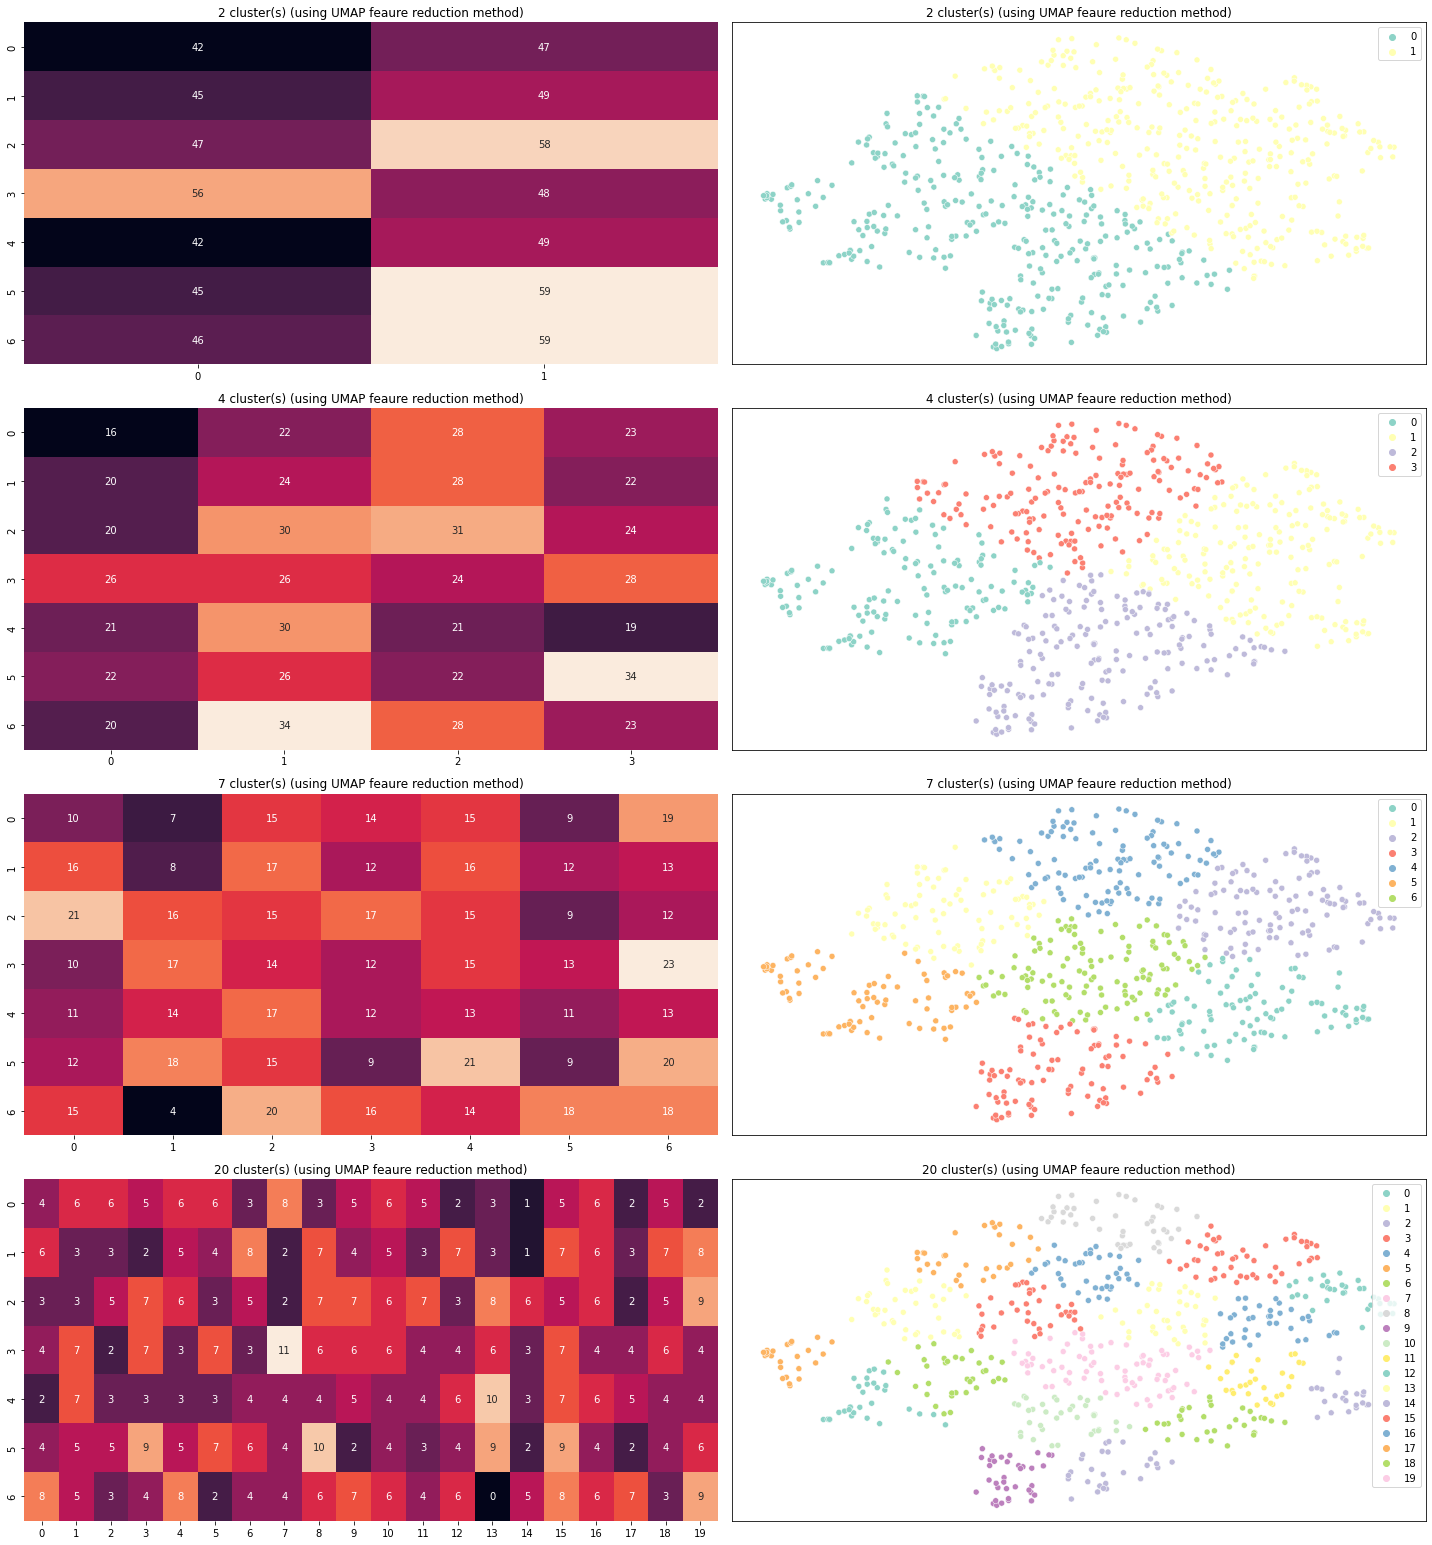

In [36]:
Clusters = [2, 4, 7, 20]
kmeans.plotClustersUsingArr(arr=clusters, fReduction=True)